## PROJECT 3: SUPERVISED LEARNING CLASSIFICATION - PERSONAL LOAN CAMPAIGN - Sai K (01/21/2023)

**Description**

**Background and Context**

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

**Objective**

* To predict whether a liability customer will buy a personal loan or not.
* Which variables are most significant.
* Which segment of customers should be targeted more

**Data Dictionary**
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

**Importing necessary libraries**

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%reload_ext nb_black

import pandas as pd
import numpy as np


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
)

import warnings

warnings.filterwarnings("ignore")

pd.set_option(
    "display.float_format", lambda x: "%.3f" % x
)  # to restrict the float value to 3 decimal places
pd.set_option(
    "display.max_columns", None
)  # Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_rows", 200)  # pd.set_option('display.max_rows', None)

<IPython.core.display.Javascript object>

**Importing the 'Loan Modelling' csv file**

In [2]:
data = pd.read_csv(
    "C:/Users/OneDrive/Desktop/Python/4_supervised_learning_classification/project/Loan_Modelling.csv"
)
df = data.copy()

<IPython.core.display.Javascript object>

**Understanding the structure of the data**

In [3]:
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4  1.600          1         0   
1   2   45          19      34    90089       3  1.500          1         0   
2   3   39          15      11    94720       1  1.000          1         0   
3   4   35           9     100    94112       1  2.700          2         0   
4   5   35           8      45    91330       4  1.000          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

<IPython.core.display.Javascript object>

In [4]:
df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1  1.900          3   
4996  4997   30           4      15    92037       4  0.400          1   
4997  4998   63          39      24    93023       2  0.300          3   
4998  4999   65          40      49    90034       3  0.500          2   
4999  5000   28           4      83    92612       3  0.800          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

<IPython.core.display.Javascript object>

In [5]:
np.random.seed(1)
df.sample(n=10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
2764  2765   31           5      84    91320       1  2.900          3   
4767  4768   35           9      45    90639       3  0.900          1   
3814  3815   34           9      35    94304       3  1.300          1   
3499  3500   49          23     114    94550       1  0.300          1   
2735  2736   36          12      70    92131       3  2.600          2   
3922  3923   31           4      20    95616       4  1.500          2   
2701  2702   50          26      55    94305       1  1.600          2   
1179  1180   36          11      98    90291       3  1.200          3   
932    933   51          27     112    94720       3  1.800          2   
792    793   41          16      98    93117       1  4.000          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
2764       105              0                   0           0       0   
4767       101              0                   1           0       0   
3814         0              0                   0           0       0   
3499       286              0                   0           0       1   
2735       165              0                   0           0       1   
3922         0              0                   0           0       1   
2701         0              0                   0           0       1   
1179         0              0                   1           0       0   
932          0              0                   1           1       1   
792          0              0                   0           0       0   

      CreditCard  
2764           1  
4767           0  
3814           0  
3499           0  
2735           0  
3922           0  
2701           0  
1179           1  
932            1  
792            1

<IPython.core.display.Javascript object>

In [6]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the data set.")

There are 5000 rows and 14 columns in the data set.


<IPython.core.display.Javascript object>

In [7]:
df.drop(["ID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

* Column ID can be dropped as there is NO meaningful relation with the data provided

**Data Types**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


<IPython.core.display.Javascript object>

**Missing values**

In [9]:
df.isnull().sum().sort_values(ascending=False)

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

**Duplicated values**

In [10]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [11]:
df[df.duplicated()].count()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

In [12]:
df.drop_duplicates(inplace=True)

<IPython.core.display.Javascript object>

In [13]:
for i in df.columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts(ascending=False))
    print(f"\n\n\\n")
    print(df[i].value_counts(normalize=True) * 100)
    print("*" * 50)

Unique values in Age are :
35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
45    127
60    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
67     12
23     12
Name: Age, dtype: int64


\n
35   3.020
43   2.980
52   2.900
54   2.860
58   2.860
50   2.760
41   2.720
30   2.720
56   2.700
34   2.680
39   2.660
57   2.640
59   2.640
51   2.580
45   2.540
60   2.540
46   2.540
42   2.520
31   2.500
40   2.500
55   2.500
29   2.460
62   2.460
61   2.440
44   2.420
32   2.400
33   2.400
48   2.360
38   2.300
49   2.300
47   2.260
53   2.240
63   2.160
36   2.140
37   2.120
28   2.060
27   1.820
65   1.600
64   1.560
26   1.560
25   1.060
24   0.560
66   0.480
67   0.240
23   0.240

<IPython.core.display.Javascript object>

In [14]:
df.describe().T

count      mean      std       min       25%       50%  \
Age                5000.000    45.338   11.463    23.000    35.000    45.000   
Experience         5000.000    20.105   11.468    -3.000    10.000    20.000   
Income             5000.000    73.774   46.034     8.000    39.000    64.000   
ZIPCode            5000.000 93169.257 1759.455 90005.000 91911.000 93437.000   
Family             5000.000     2.396    1.148     1.000     1.000     2.000   
CCAvg              5000.000     1.938    1.748     0.000     0.700     1.500   
Education          5000.000     1.881    0.840     1.000     1.000     2.000   
Mortgage           5000.000    56.499  101.714     0.000     0.000     0.000   
Personal_Loan      5000.000     0.096    0.295     0.000     0.000     0.000   
Securities_Account 5000.000     0.104    0.306     0.000     0.000     0.000   
CD_Account         5000.000     0.060    0.238     0.000     0.000     0.000   
Online             5000.000     0.597    0.491     0.000     0.000     1.000   
CreditCard         5000.000     0.294    0.456     0.000     0.000     0.000   

                         75%       max  
Age                   55.000    67.000  
Experience            30.000    43.000  
Income                98.000   224.000  
ZIPCode            94608.000 96651.000  
Family                 3.000     4.000  
CCAvg                  2.500    10.000  
Education              3.000     3.000  
Mortgage             101.000   635.000  
Personal_Loan          0.000     1.000  
Securities_Account     0.000     1.000  
CD_Account             0.000     1.000  
Online                 1.000     1.000  
CreditCard             1.000     1.000

<IPython.core.display.Javascript object>

In [15]:
df.nunique()

Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64

<IPython.core.display.Javascript object>

**Inferences**

- There are 13 duplicate values in the dataset, which were dropped.
- There are no missing values in the data.
- ID column is dropped
- Most of the data-types are **int64** and only CCAvg is **float64**.
- The two columns: "Personal Loan", "Securities_Account", "CD_Account", "Online", and "Credit Card", are of **bool** data-type.
- There are 52 Experience entries < 0. This needs to be addressed 
- Mortgage can be severly right skewed. Need to check in EDA
- ZIP Code is in **int64** dtype but can be converted into object type. 


## Data Preprocessing

* The negative values in Experience will need to be fixed

In [16]:
df[df["Experience"] < 0]["Experience"].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

<IPython.core.display.Javascript object>

In [17]:
df[df["Experience"] > 30]["Age"].describe().T

count   1157.000
mean      60.379
std        2.903
min       55.000
25%       58.000
50%       60.000
75%       63.000
max       67.000
Name: Age, dtype: float64

<IPython.core.display.Javascript object>

In [18]:
df["Experience"] = df["Experience"].replace([-3, -2, -1], 0)

<IPython.core.display.Javascript object>

In [19]:
df.describe().T

count      mean      std       min       25%       50%  \
Age                5000.000    45.338   11.463    23.000    35.000    45.000   
Experience         5000.000    20.120   11.440     0.000    10.000    20.000   
Income             5000.000    73.774   46.034     8.000    39.000    64.000   
ZIPCode            5000.000 93169.257 1759.455 90005.000 91911.000 93437.000   
Family             5000.000     2.396    1.148     1.000     1.000     2.000   
CCAvg              5000.000     1.938    1.748     0.000     0.700     1.500   
Education          5000.000     1.881    0.840     1.000     1.000     2.000   
Mortgage           5000.000    56.499  101.714     0.000     0.000     0.000   
Personal_Loan      5000.000     0.096    0.295     0.000     0.000     0.000   
Securities_Account 5000.000     0.104    0.306     0.000     0.000     0.000   
CD_Account         5000.000     0.060    0.238     0.000     0.000     0.000   
Online             5000.000     0.597    0.491     0.000     0.000     1.000   
CreditCard         5000.000     0.294    0.456     0.000     0.000     0.000   

                         75%       max  
Age                   55.000    67.000  
Experience            30.000    43.000  
Income                98.000   224.000  
ZIPCode            94608.000 96651.000  
Family                 3.000     4.000  
CCAvg                  2.500    10.000  
Education              3.000     3.000  
Mortgage             101.000   635.000  
Personal_Loan          0.000     1.000  
Securities_Account     0.000     1.000  
CD_Account             0.000     1.000  
Online                 1.000     1.000  
CreditCard             1.000     1.000

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

**Functions to carry out Exploratory Data Analysis**

In [20]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [22]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [23]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

**Univariate Analysis**

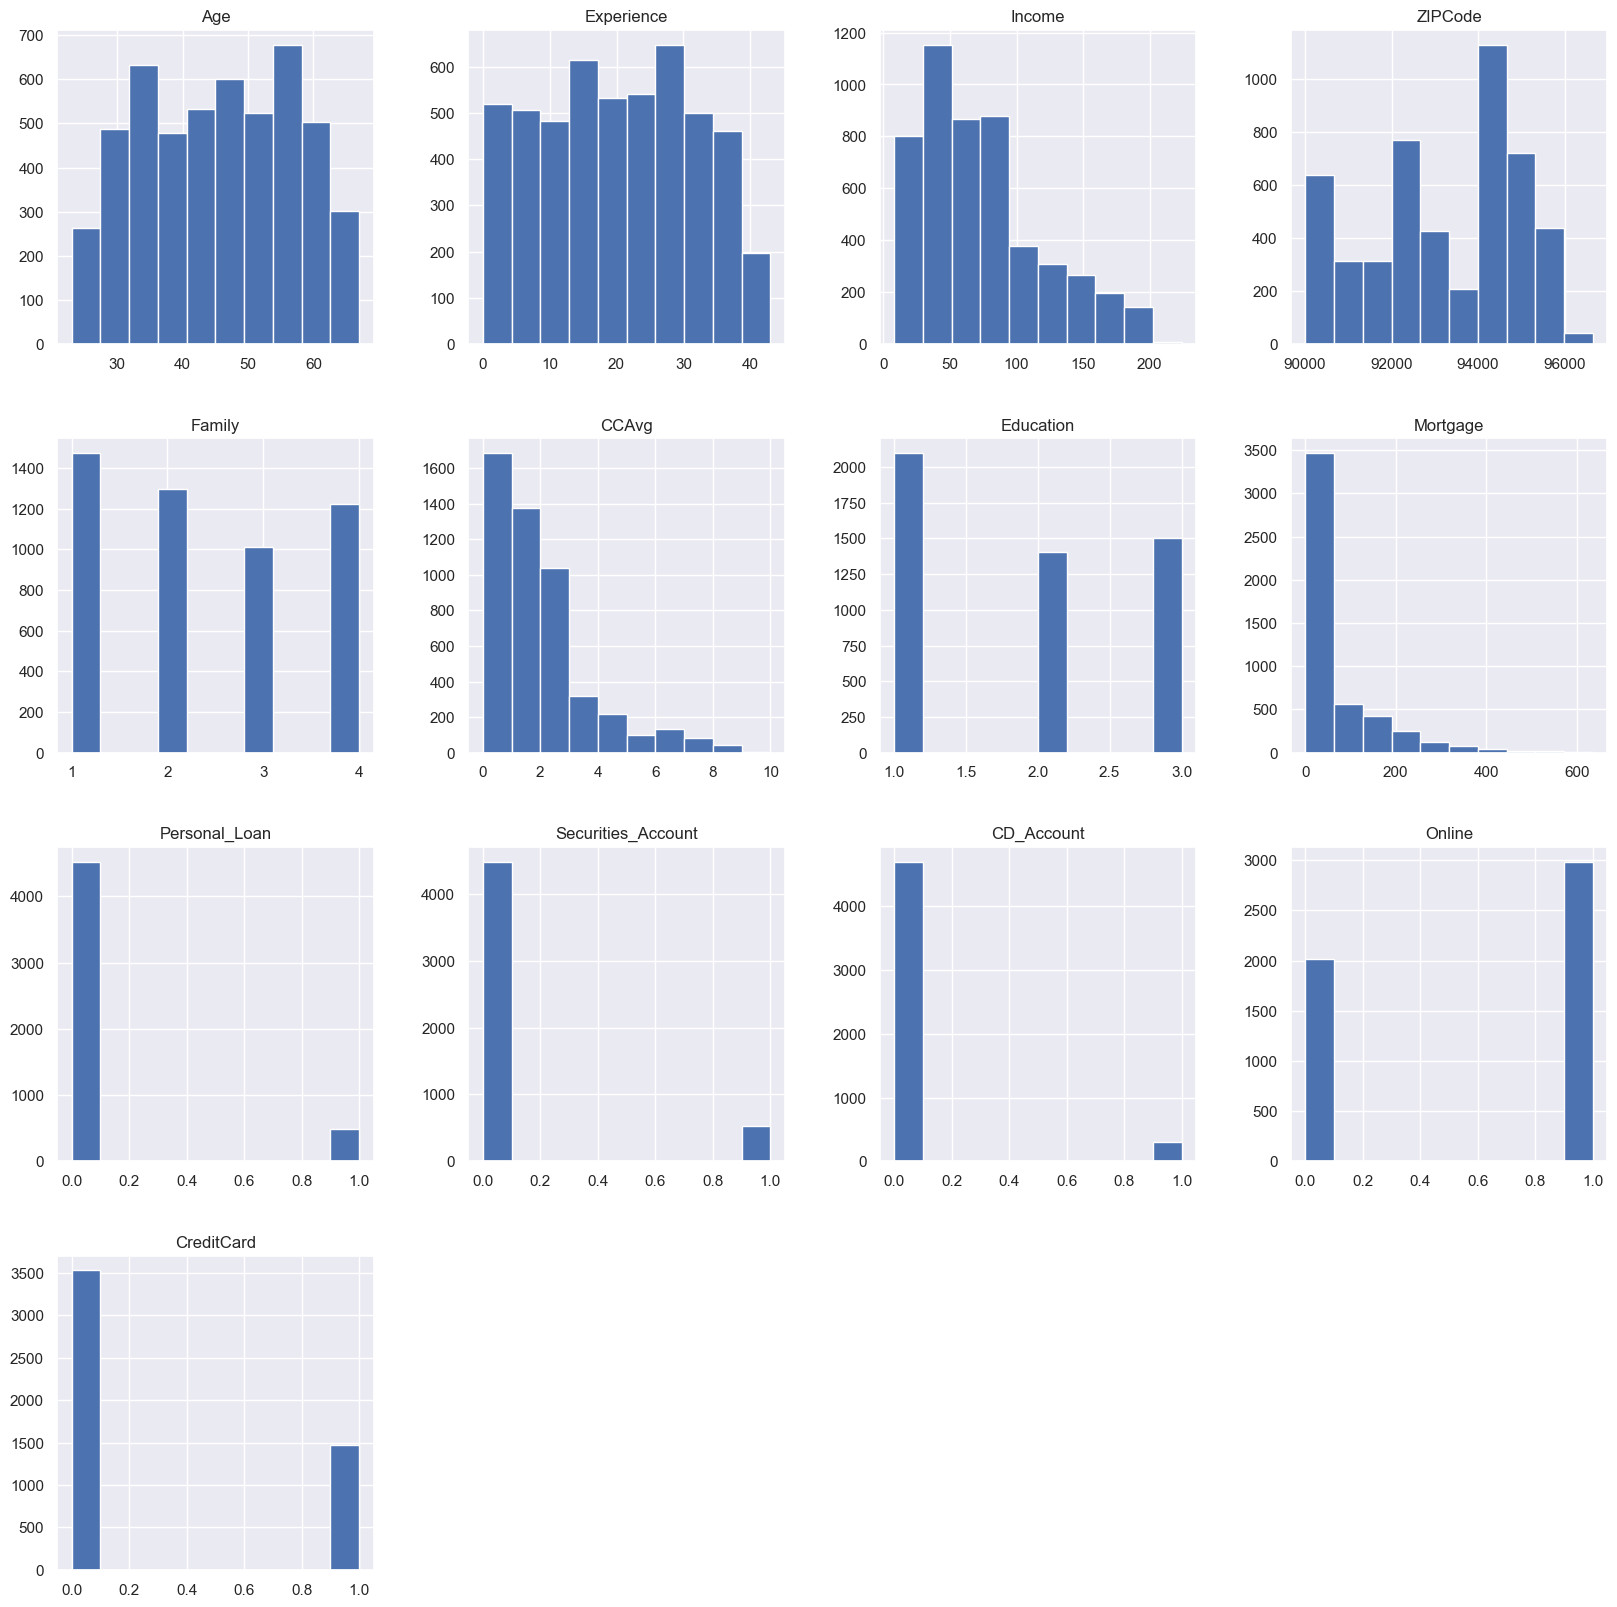

<IPython.core.display.Javascript object>

In [24]:
df.hist(figsize=(20, 20))
plt.show()

**Histrogram and BoxPlot**

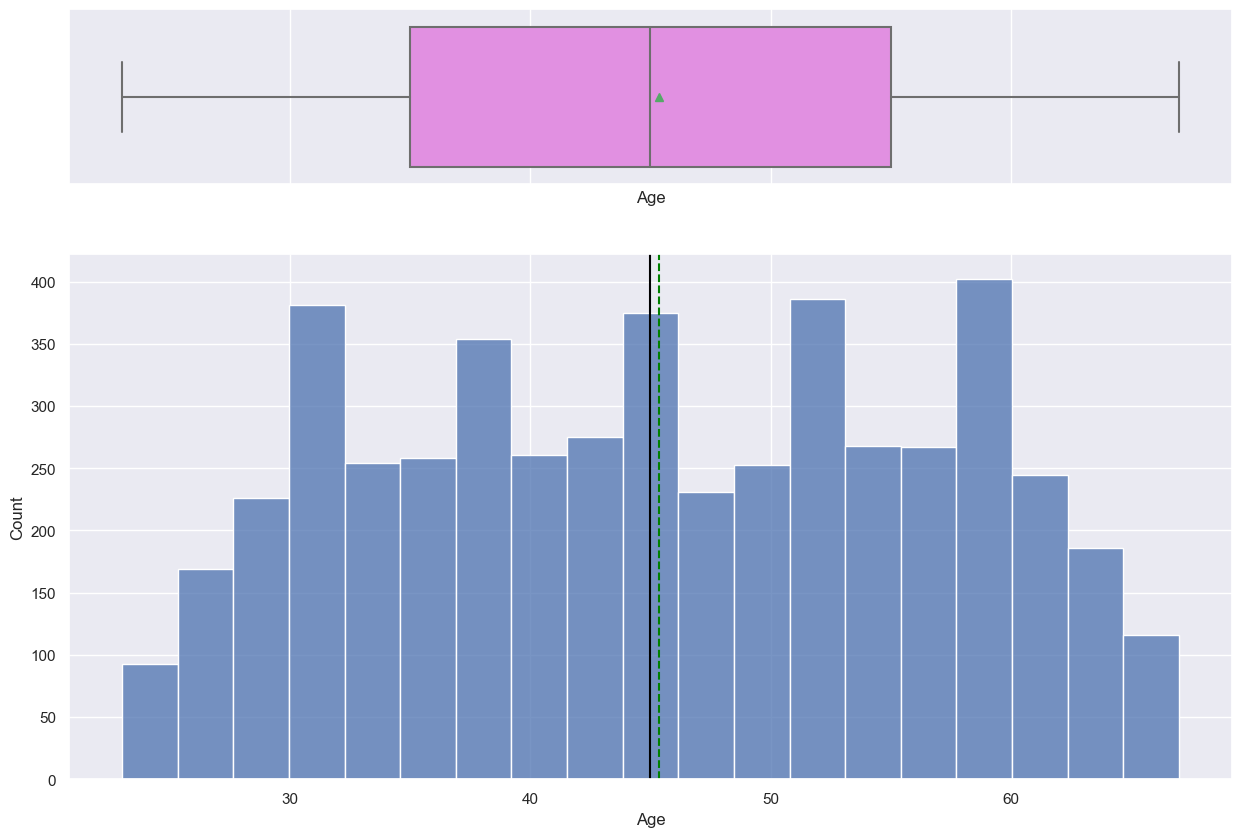

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(data, "Age")

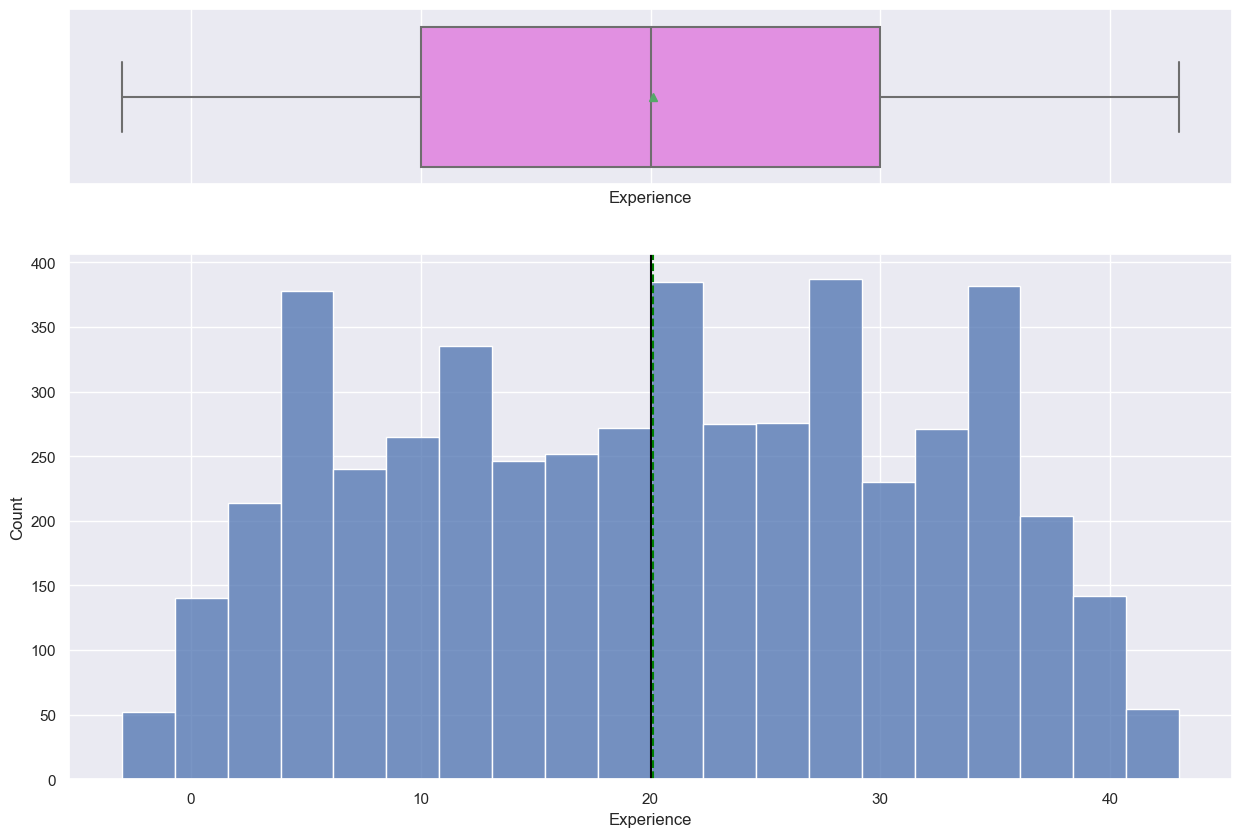

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(data, "Experience")

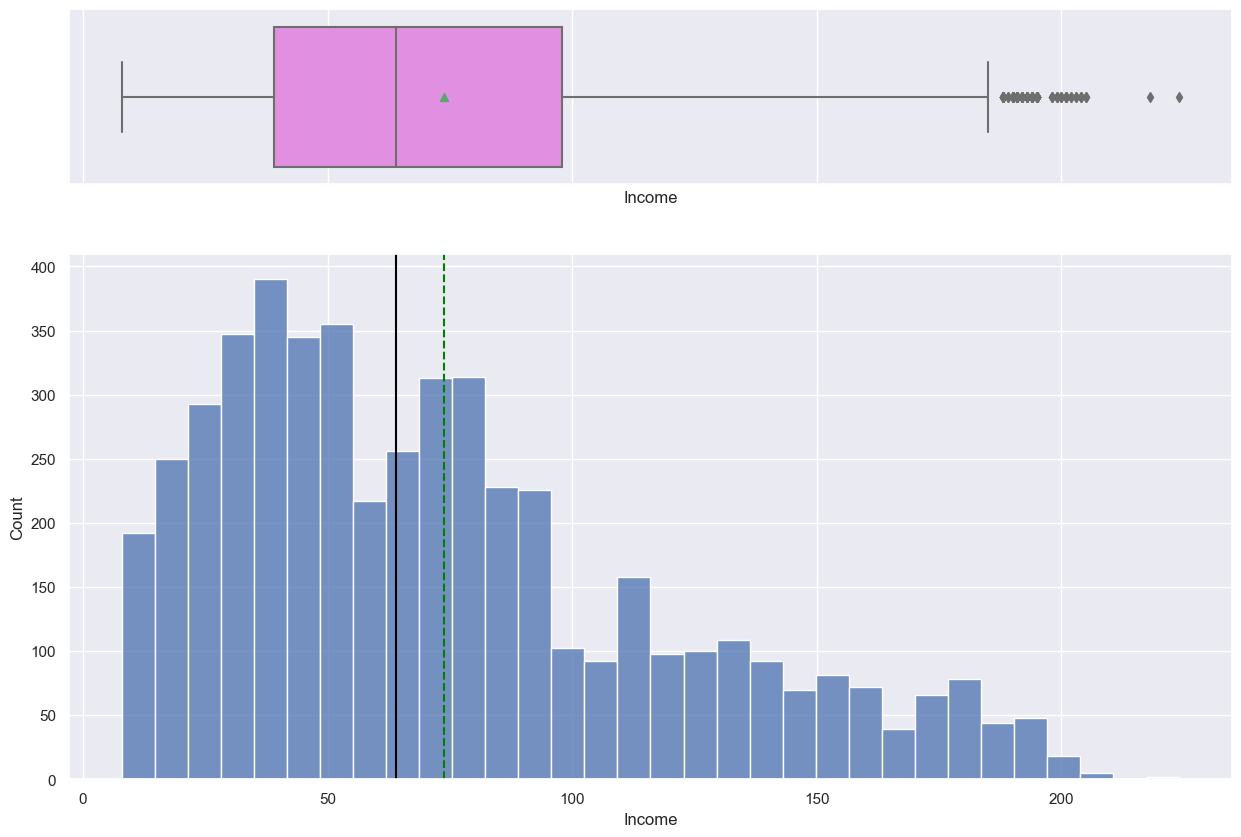

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(data, "Income")

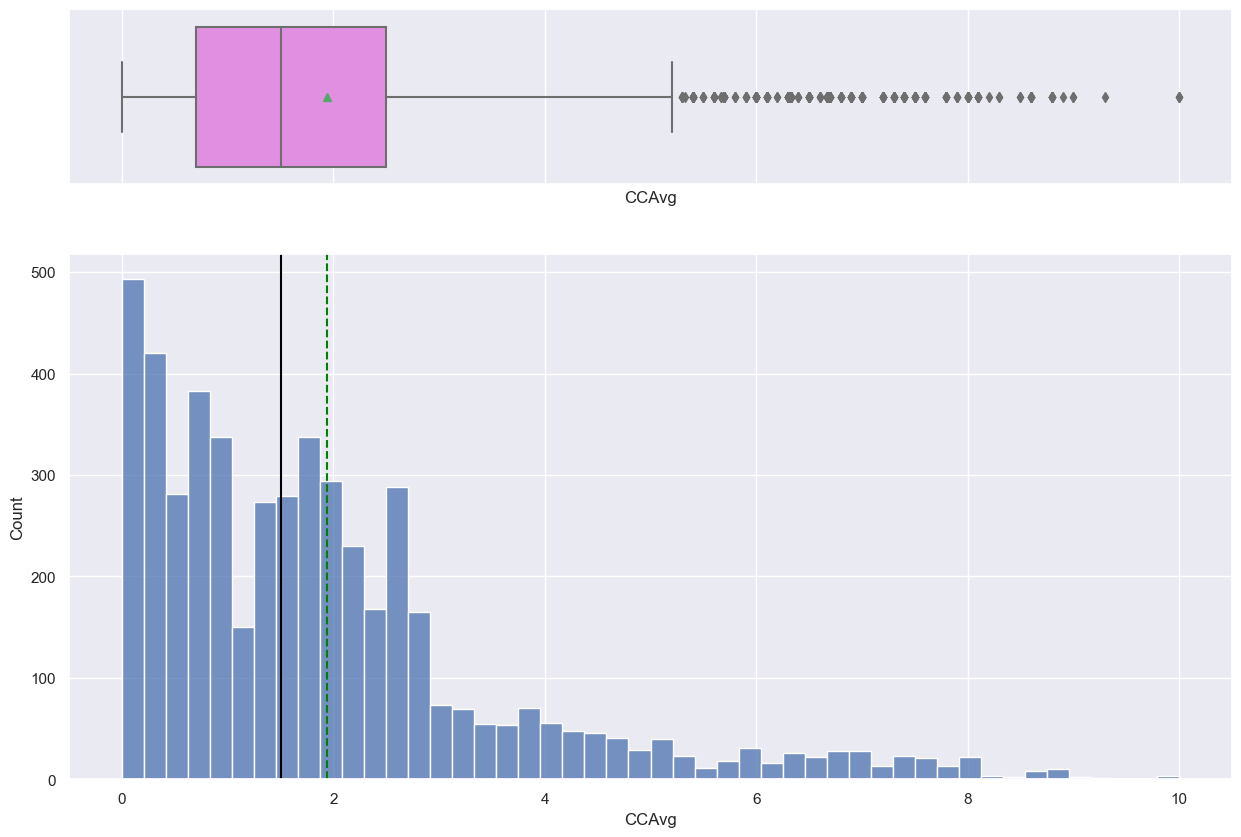

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(data, "CCAvg")

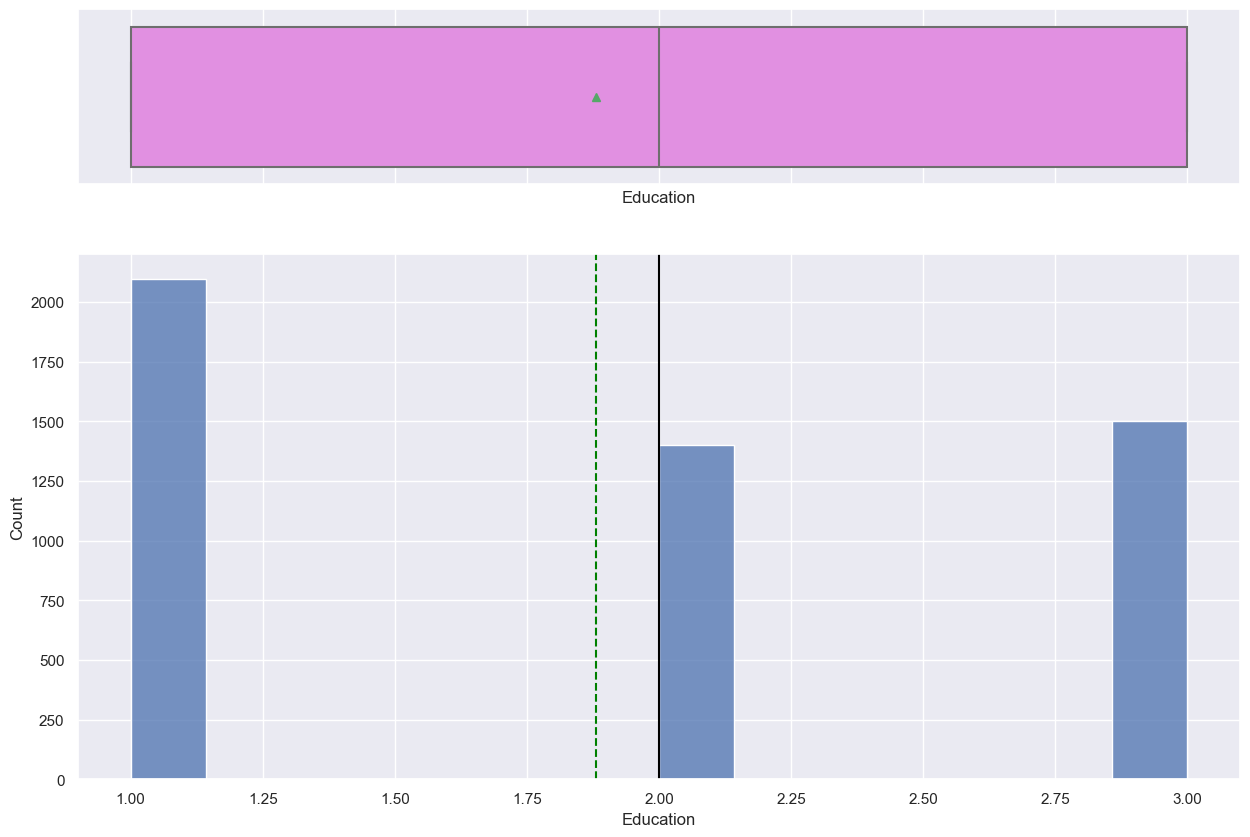

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(data, "Education")

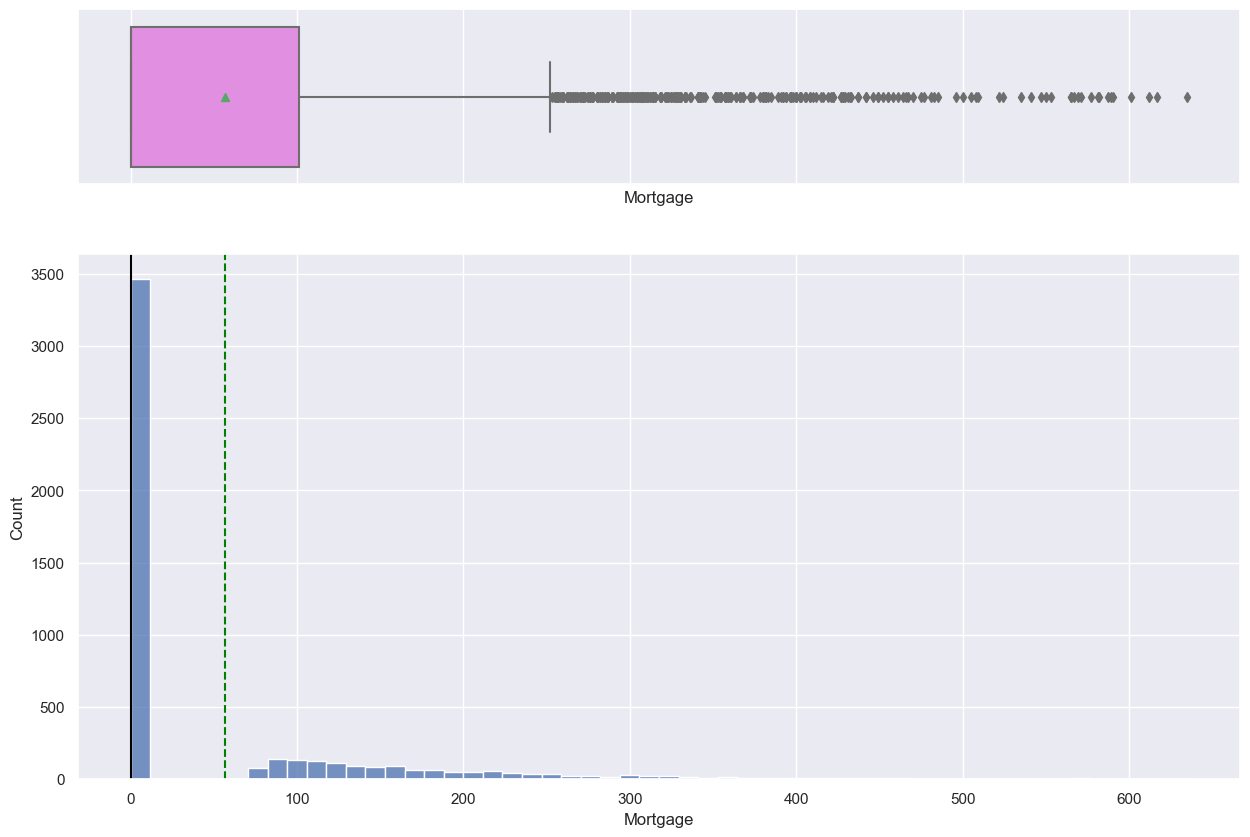

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(data, "Mortgage")

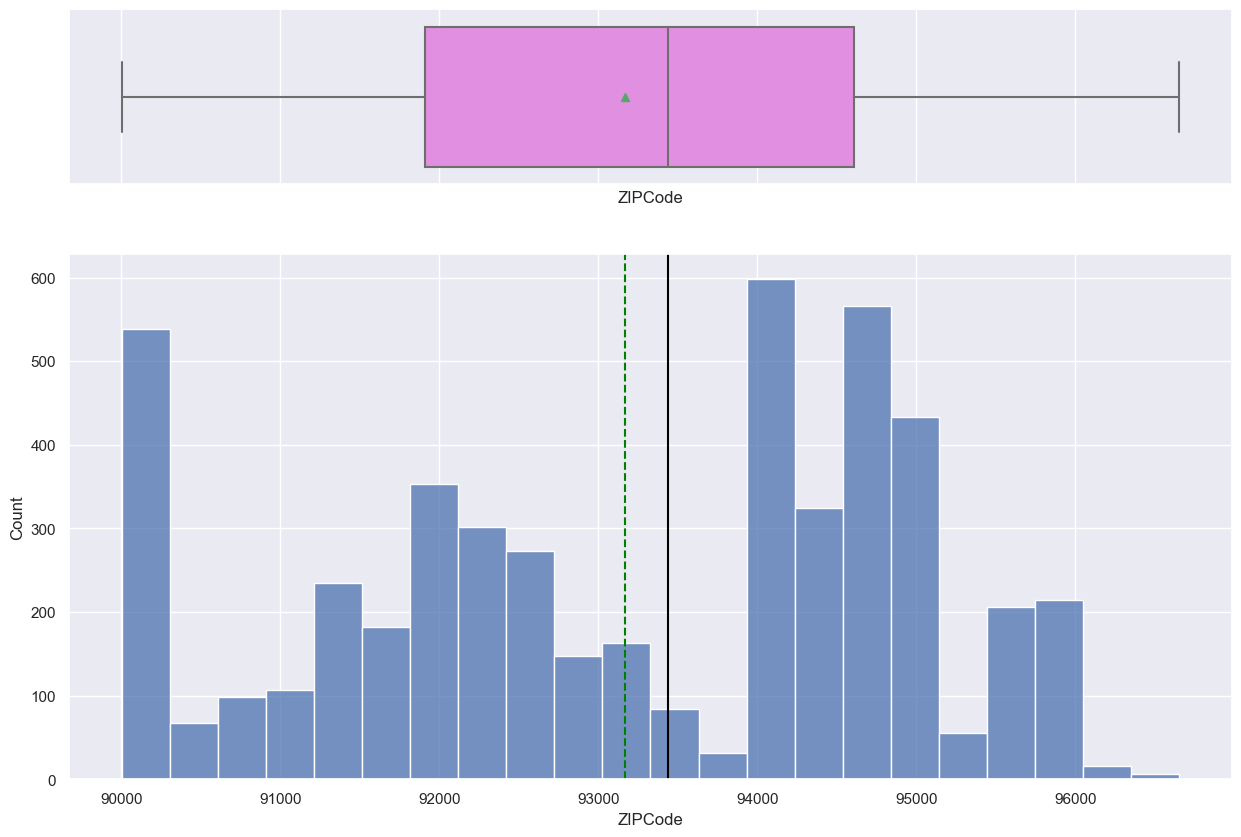

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(data, "ZIPCode")

**Labeled Barplot**

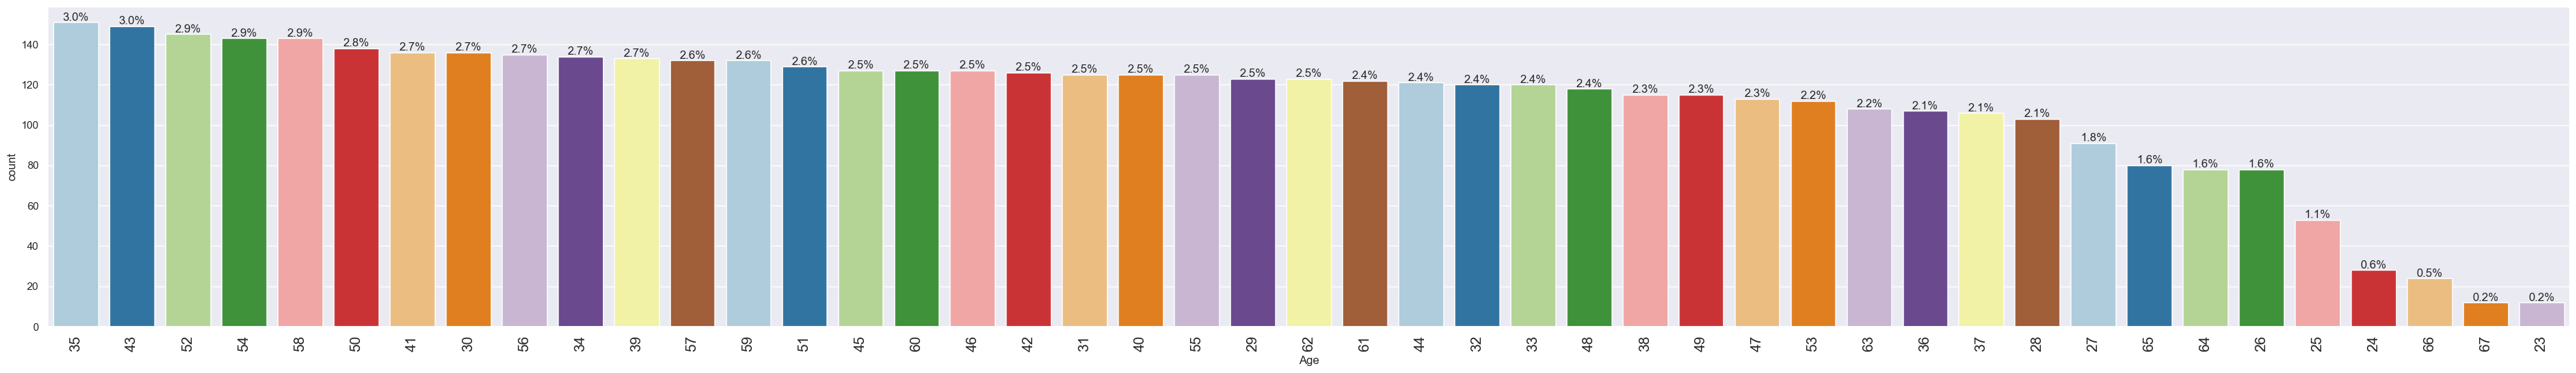

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(data, "Age", perc=True)

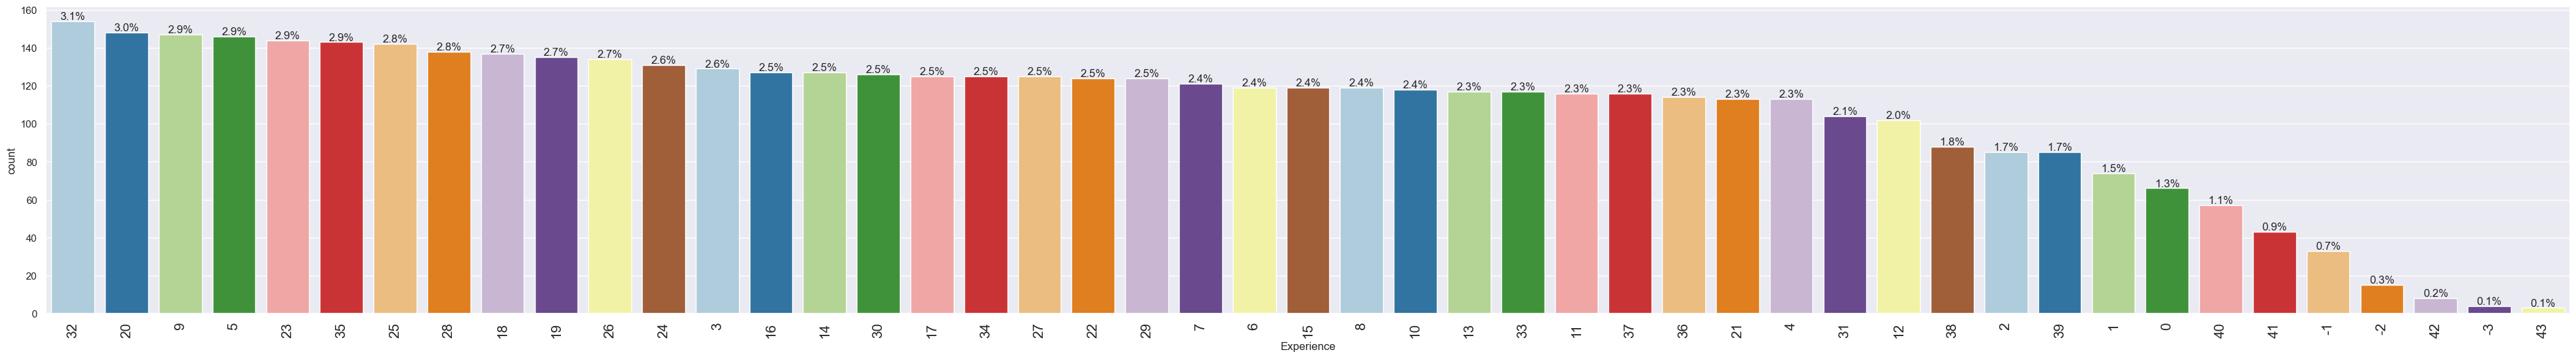

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(data, "Experience", perc=True)

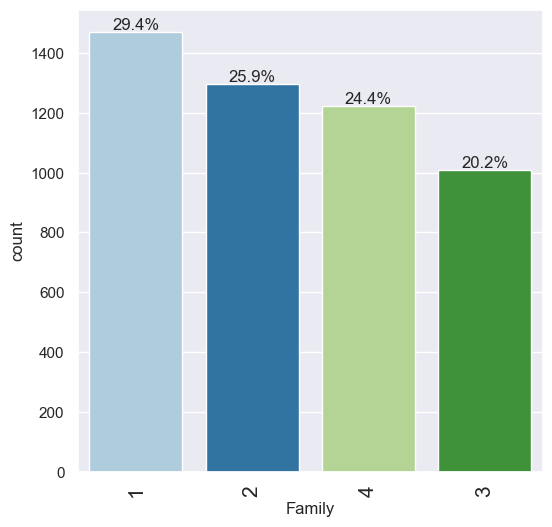

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(data, "Family", perc=True)

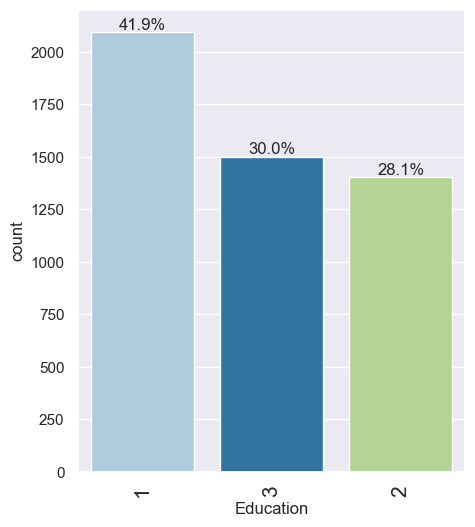

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(data, "Education", perc=True)

**Stacked Bar Plot**

**Family vs Personal Loan**

In [36]:
df.groupby(["Family"])["Personal_Loan"].value_counts()

Family  Personal_Loan
1       0                1365
        1                 107
2       0                1190
        1                 106
3       0                 877
        1                 133
4       0                1088
        1                 134
Name: Personal_Loan, dtype: int64

<IPython.core.display.Javascript object>

In [37]:
df.groupby(["Family"])["Personal_Loan"].value_counts(normalize=True) * 100

Family  Personal_Loan
1       0               92.731
        1                7.269
2       0               91.821
        1                8.179
3       0               86.832
        1               13.168
4       0               89.034
        1               10.966
Name: Personal_Loan, dtype: float64

<IPython.core.display.Javascript object>

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


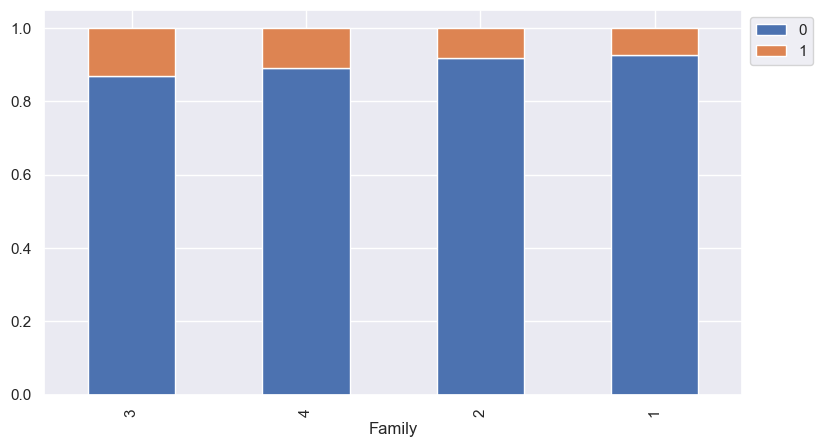

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(data, "Family", "Personal_Loan")

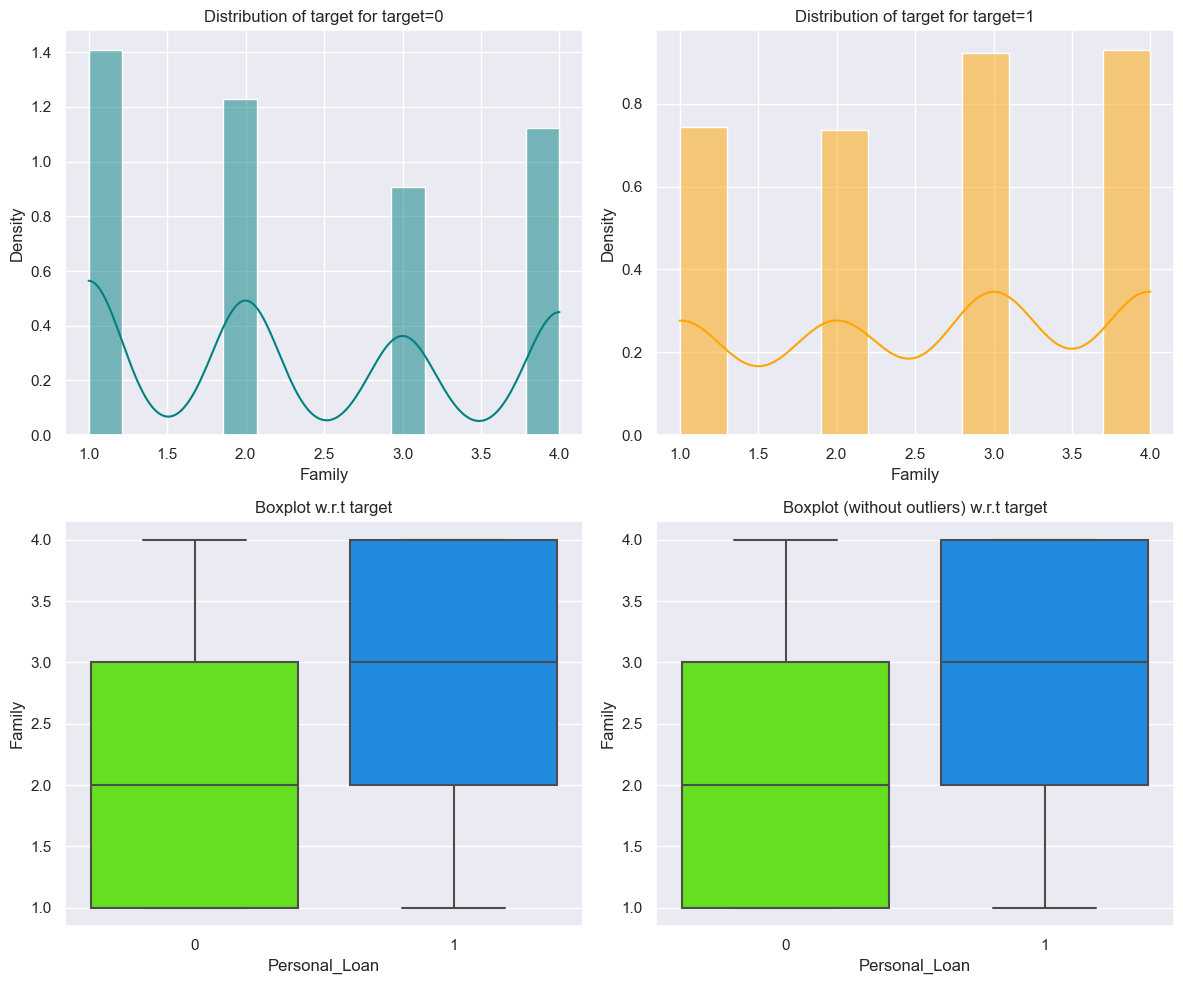

<IPython.core.display.Javascript object>

In [39]:
distribution_plot_wrt_target(data, "Family", "Personal_Loan")

**Education vs Personal Loan**

In [40]:
df.groupby(["Education"])["Personal_Loan"].value_counts()

Education  Personal_Loan
1          0                2003
           1                  93
2          0                1221
           1                 182
3          0                1296
           1                 205
Name: Personal_Loan, dtype: int64

<IPython.core.display.Javascript object>

In [41]:
df.groupby(["Education"])["Personal_Loan"].value_counts(normalize=True) * 100

Education  Personal_Loan
1          0               95.563
           1                4.437
2          0               87.028
           1               12.972
3          0               86.342
           1               13.658
Name: Personal_Loan, dtype: float64

<IPython.core.display.Javascript object>

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


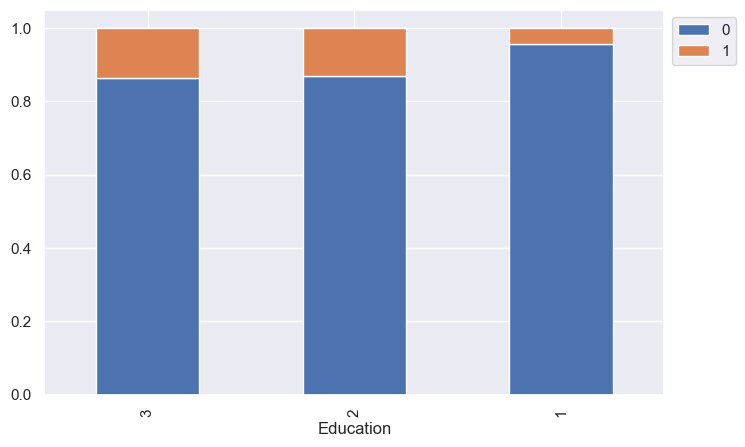

<IPython.core.display.Javascript object>

In [42]:
stacked_barplot(data, "Education", "Personal_Loan")

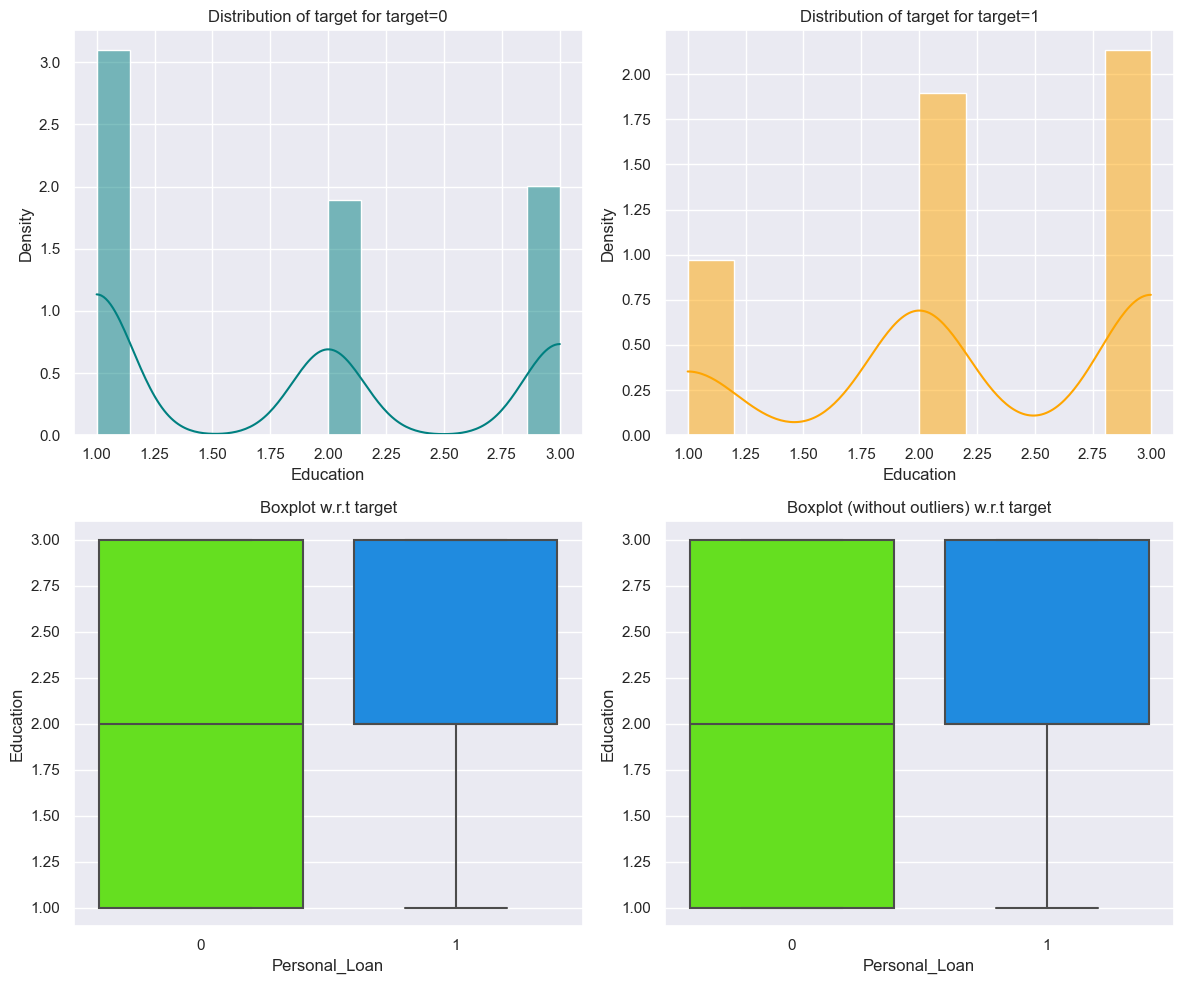

<IPython.core.display.Javascript object>

In [43]:
distribution_plot_wrt_target(data, "Education", "Personal_Loan")

**Securities Account vs Personal Loan**

In [44]:
df.groupby(["Securities_Account"])["Personal_Loan"].value_counts()

Securities_Account  Personal_Loan
0                   0                4058
                    1                 420
1                   0                 462
                    1                  60
Name: Personal_Loan, dtype: int64

<IPython.core.display.Javascript object>

In [45]:
df.groupby(["Securities_Account"])["Personal_Loan"].value_counts(normalize=True) * 100

Securities_Account  Personal_Loan
0                   0               90.621
                    1                9.379
1                   0               88.506
                    1               11.494
Name: Personal_Loan, dtype: float64

<IPython.core.display.Javascript object>

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


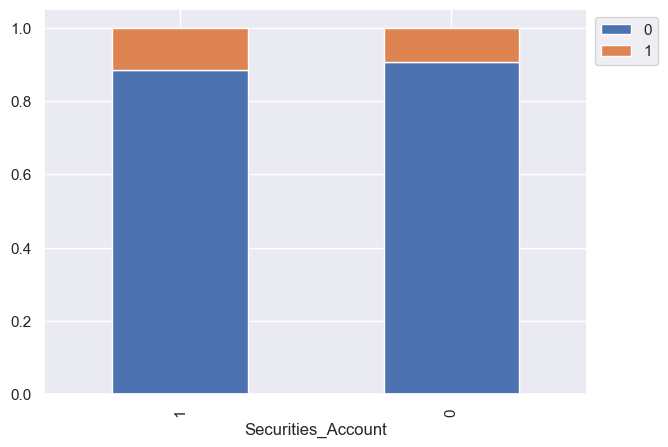

<IPython.core.display.Javascript object>

In [46]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

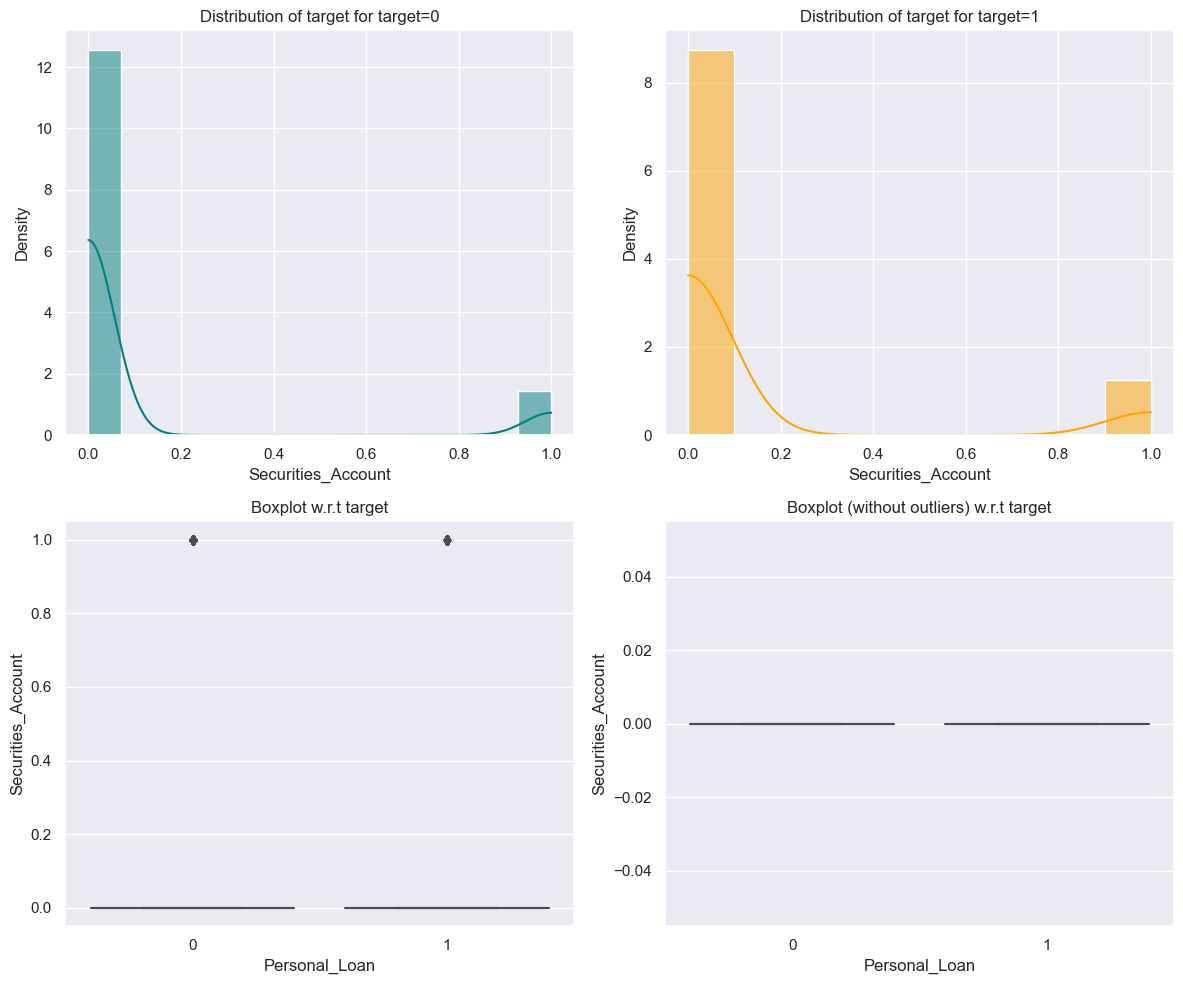

<IPython.core.display.Javascript object>

In [47]:
distribution_plot_wrt_target(data, "Securities_Account", "Personal_Loan")

**CD vs Persoanl Loan**

In [48]:
df.groupby(["CD_Account"])["Personal_Loan"].value_counts()

CD_Account  Personal_Loan
0           0                4358
            1                 340
1           0                 162
            1                 140
Name: Personal_Loan, dtype: int64

<IPython.core.display.Javascript object>

In [49]:
df.groupby(["CD_Account"])["Personal_Loan"].value_counts(normalize=True) * 100

CD_Account  Personal_Loan
0           0               92.763
            1                7.237
1           0               53.642
            1               46.358
Name: Personal_Loan, dtype: float64

<IPython.core.display.Javascript object>

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


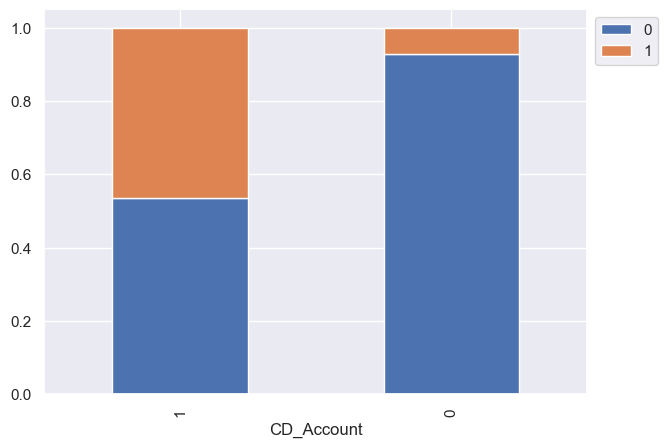

<IPython.core.display.Javascript object>

In [50]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

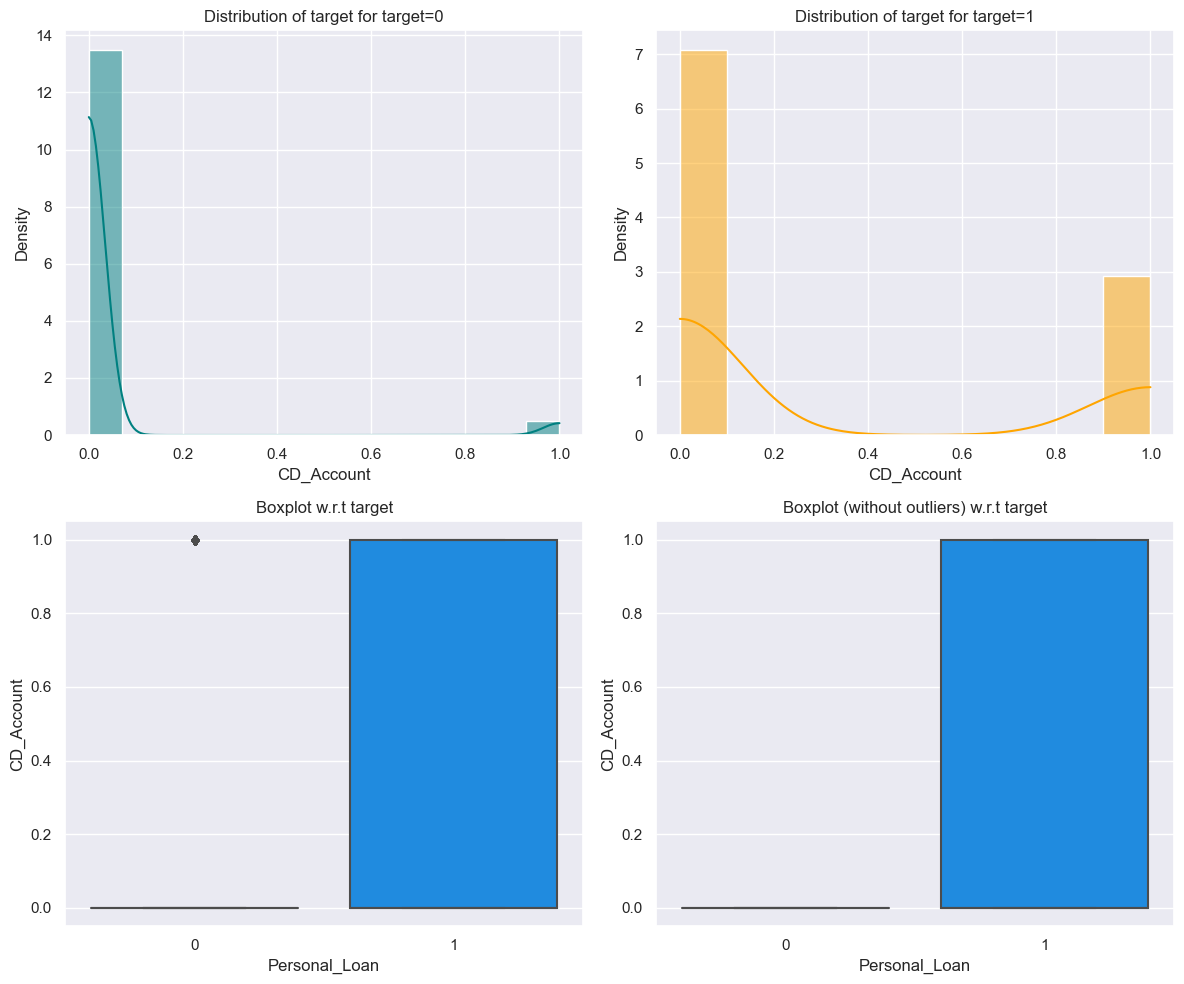

<IPython.core.display.Javascript object>

In [51]:
distribution_plot_wrt_target(data, "CD_Account", "Personal_Loan")

**Online vs Personal Loan**

In [52]:
df.groupby(["Online"])["Personal_Loan"].value_counts()

Online  Personal_Loan
0       0                1827
        1                 189
1       0                2693
        1                 291
Name: Personal_Loan, dtype: int64

<IPython.core.display.Javascript object>

In [53]:
df.groupby(["Online"])["Personal_Loan"].value_counts(normalize=True) * 100

Online  Personal_Loan
0       0               90.625
        1                9.375
1       0               90.248
        1                9.752
Name: Personal_Loan, dtype: float64

<IPython.core.display.Javascript object>

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


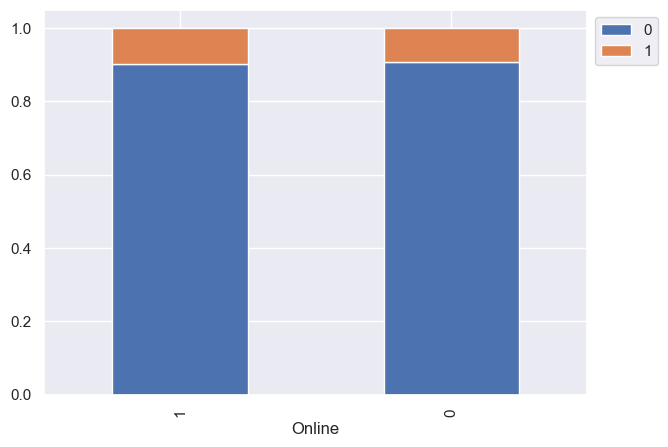

<IPython.core.display.Javascript object>

In [54]:
stacked_barplot(data, "Online", "Personal_Loan")

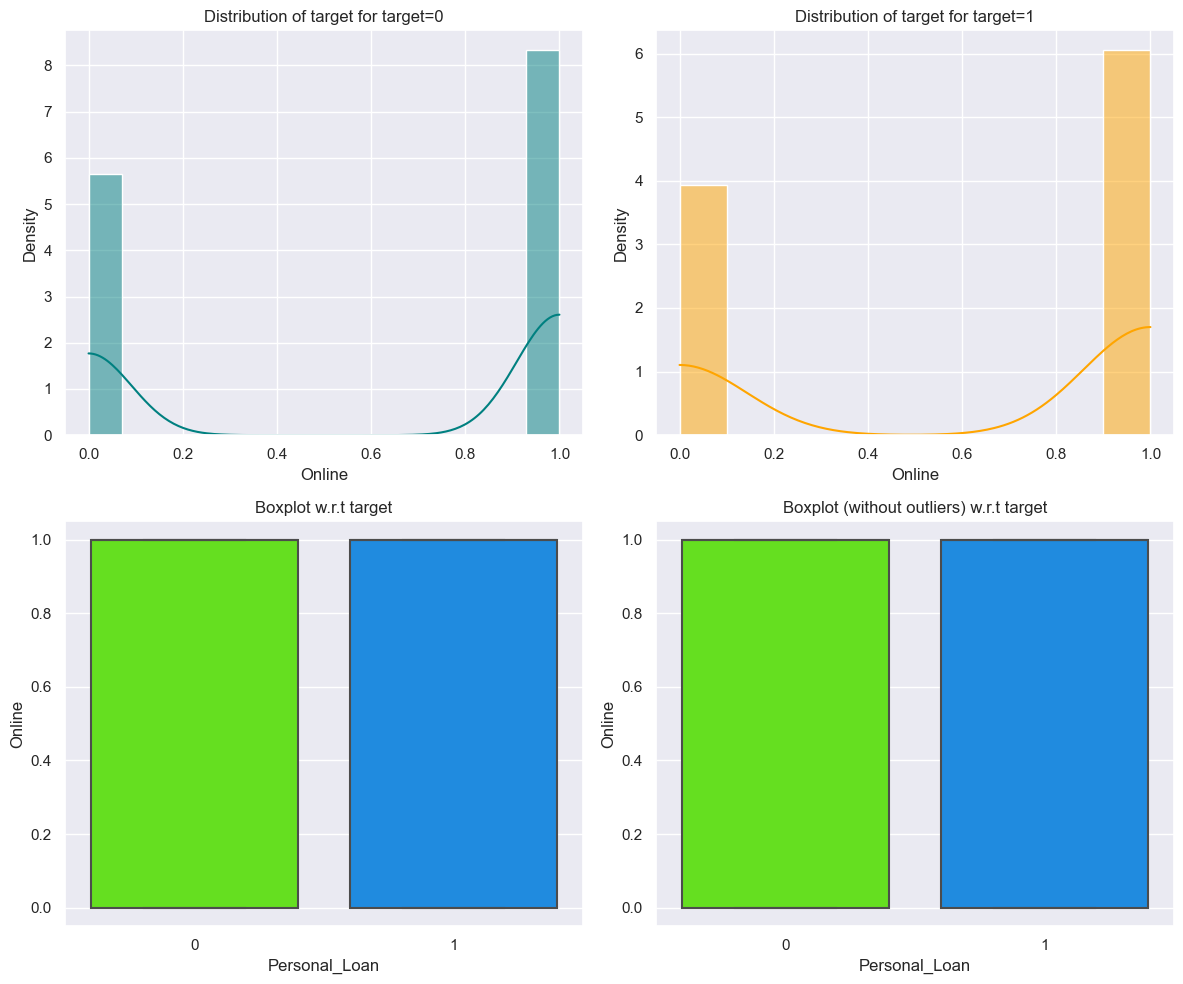

<IPython.core.display.Javascript object>

In [55]:
distribution_plot_wrt_target(data, "Online", "Personal_Loan")

**Credit Card vs Perosnal Loan**

In [56]:
df.groupby(["CreditCard"])["Personal_Loan"].value_counts()

CreditCard  Personal_Loan
0           0                3193
            1                 337
1           0                1327
            1                 143
Name: Personal_Loan, dtype: int64

<IPython.core.display.Javascript object>

In [57]:
df.groupby(["CreditCard"])["Personal_Loan"].value_counts(normalize=True) * 100

CreditCard  Personal_Loan
0           0               90.453
            1                9.547
1           0               90.272
            1                9.728
Name: Personal_Loan, dtype: float64

<IPython.core.display.Javascript object>

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


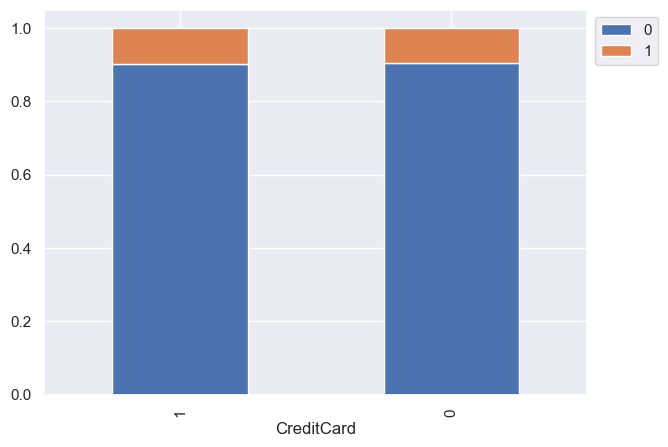

<IPython.core.display.Javascript object>

In [58]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

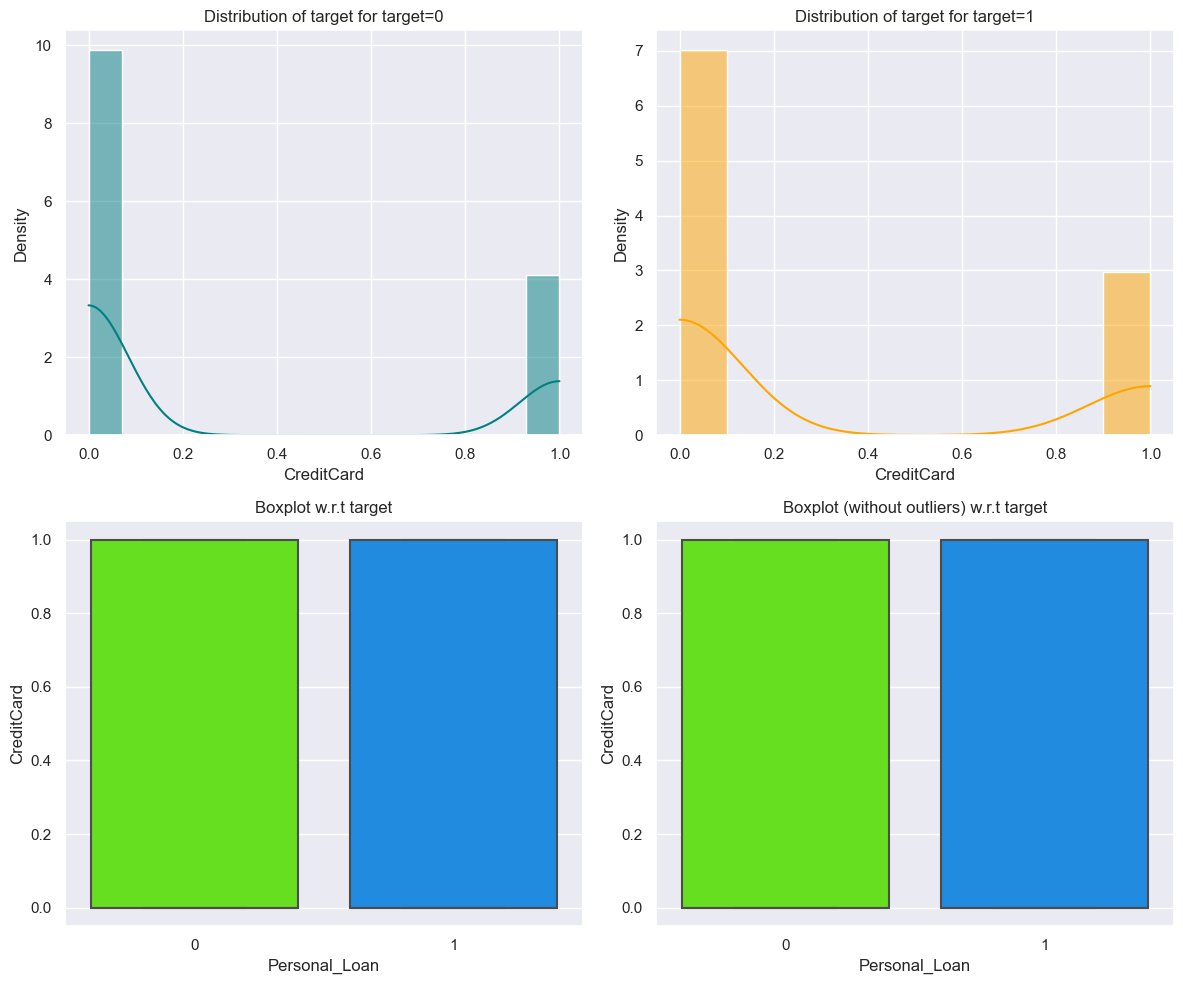

<IPython.core.display.Javascript object>

In [59]:
distribution_plot_wrt_target(data, "CreditCard", "Personal_Loan")

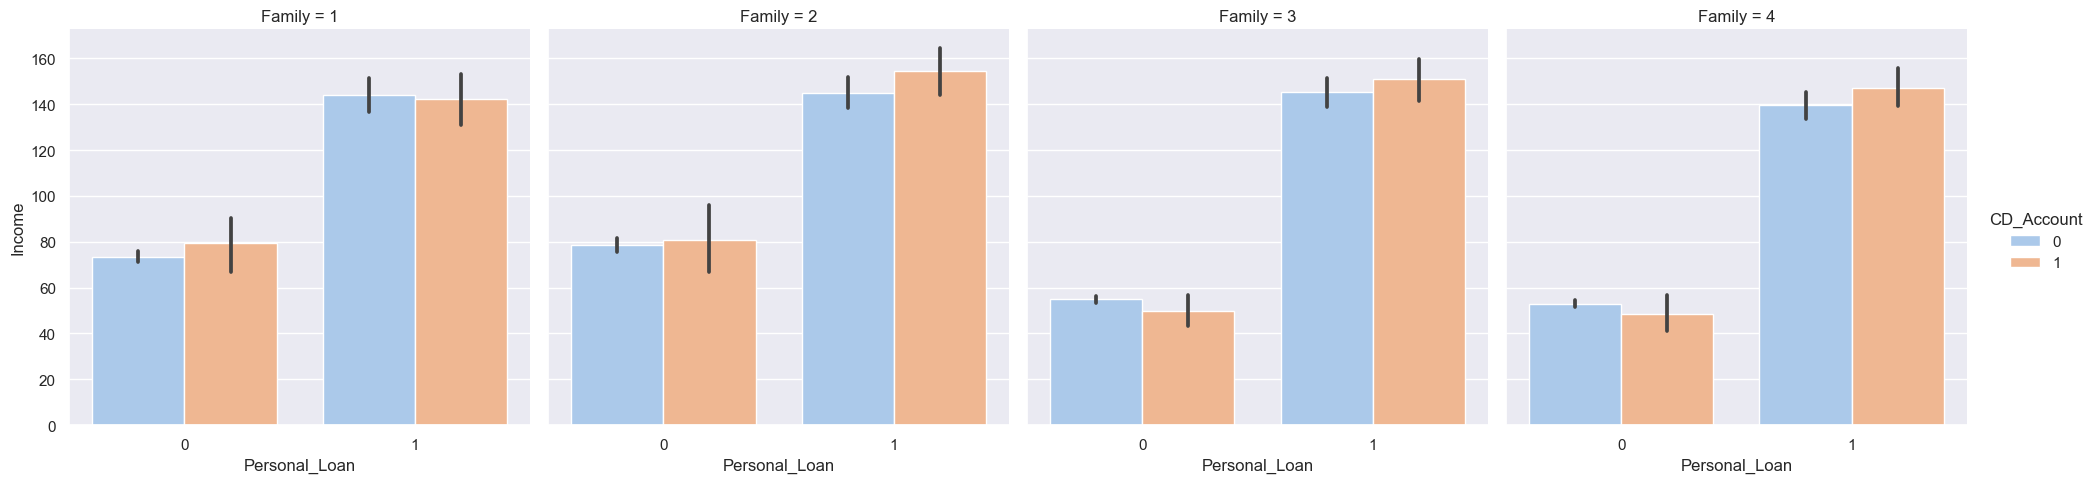

<IPython.core.display.Javascript object>

In [60]:
sns.catplot(
    data=df,
    x="Personal_Loan",
    y="Income",
    hue="CD_Account",
    col="Family",
    kind="bar",
    palette="pastel",
)

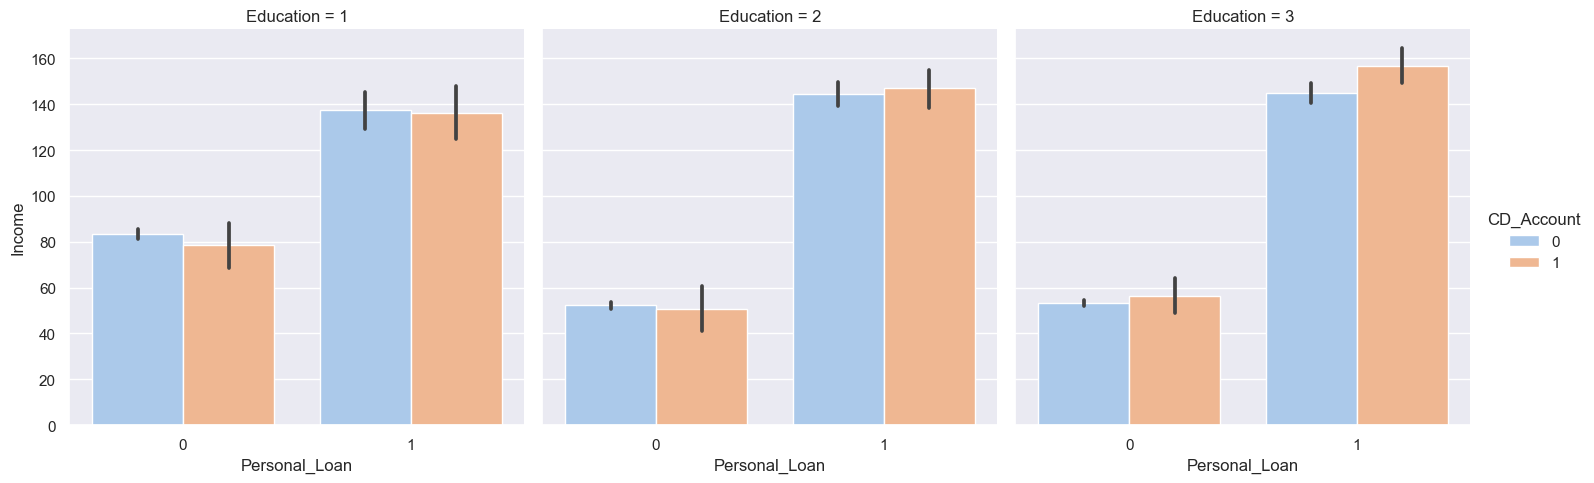

<IPython.core.display.Javascript object>

In [61]:
sns.catplot(
    data=df,
    x="Personal_Loan",
    y="Income",
    hue="CD_Account",
    col="Education",
    kind="bar",
    palette="pastel",
)

<AxesSubplot:xlabel='Personal_Loan', ylabel='Income'>

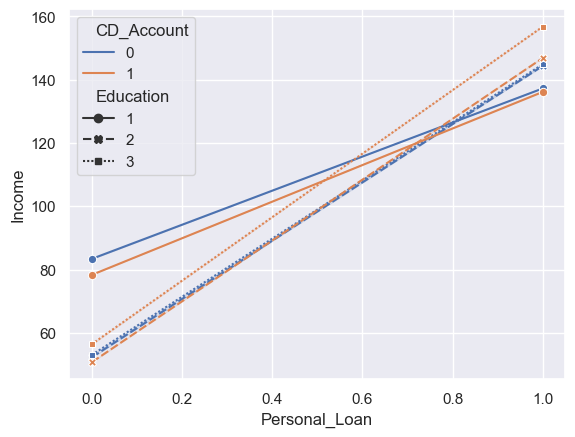

<IPython.core.display.Javascript object>

In [62]:
sns.lineplot(
    data=df,
    x="Personal_Loan",
    y="Income",
    hue="CD_Account",
    style="Education",
    ci=False,
    markers=True,
)

<AxesSubplot:xlabel='Personal_Loan', ylabel='Income'>

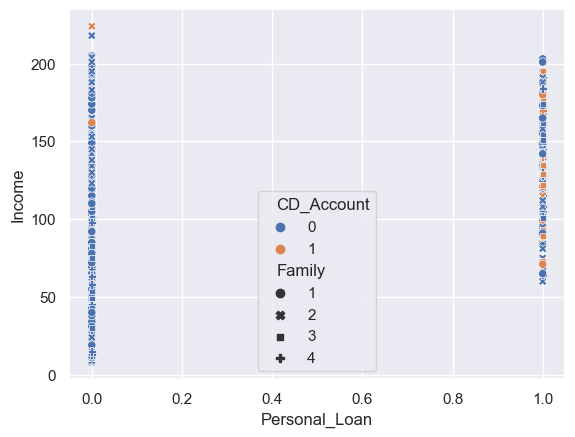

<IPython.core.display.Javascript object>

In [63]:
sns.scatterplot(
    data=df, x="Personal_Loan", y="Income", hue="CD_Account", style="Family"
)

<AxesSubplot:xlabel='Personal_Loan', ylabel='Income'>

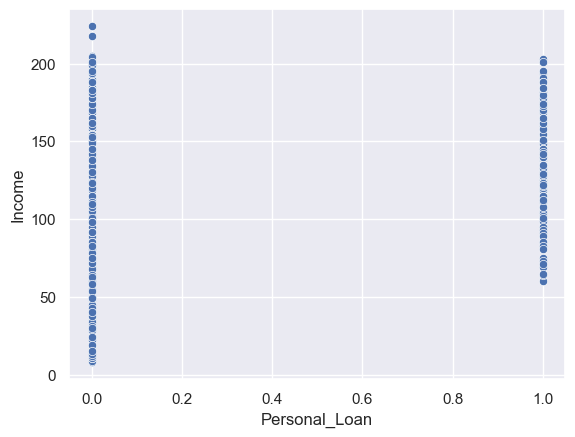

<IPython.core.display.Javascript object>

In [64]:
sns.scatterplot(data=df, x="Personal_Loan", y="Income")

<AxesSubplot:xlabel='Personal_Loan', ylabel='Income'>

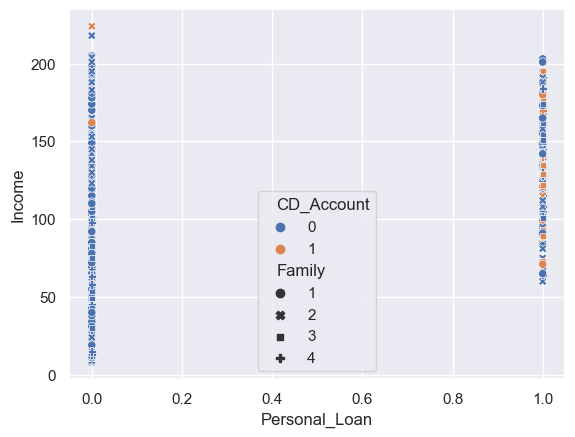

<IPython.core.display.Javascript object>

In [65]:
sns.scatterplot(
    data=df, x="Personal_Loan", y="Income", hue="CD_Account", style="Family"
)

<AxesSubplot:xlabel='Personal_Loan', ylabel='Income'>

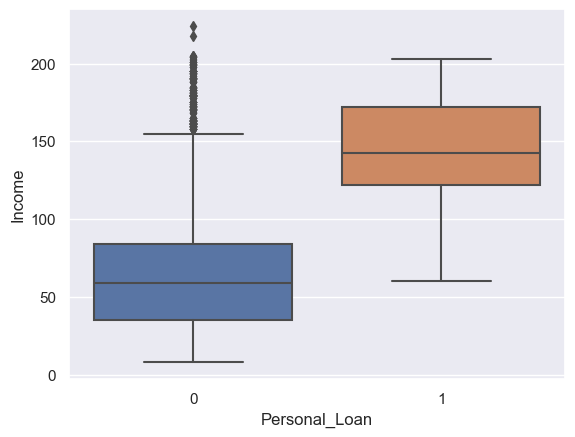

<IPython.core.display.Javascript object>

In [66]:
sns.boxplot(data=df, x="Personal_Loan", y="Income")

In [67]:
# Personal_Loan_df = df[df["Personal_Loan"] == True]
df.groupby(["Personal_Loan"])["Income"].describe().T

Personal_Loan        0       1
count         4520.000 480.000
mean            66.237 144.746
std             40.579  31.584
min              8.000  60.000
25%             35.000 122.000
50%             59.000 142.500
75%             84.000 172.000
max            224.000 203.000

<IPython.core.display.Javascript object>

In [68]:
# Personal_Loan_df = df[df["Personal_Loan"] == True]
df.groupby(["Personal_Loan"])["CCAvg"].describe().T

Personal_Loan        0       1
count         4520.000 480.000
mean             1.729   3.905
std              1.568   2.098
min              0.000   0.000
25%              0.600   2.600
50%              1.400   3.800
75%              2.300   5.348
max              8.800  10.000

<IPython.core.display.Javascript object>

In [69]:
# Personal_Loan_df = df[df["Personal_Loan"] == True]
df.groupby(["Personal_Loan"])["Mortgage"].describe().T

Personal_Loan        0       1
count         4520.000 480.000
mean            51.789 100.846
std             92.039 160.848
min              0.000   0.000
25%              0.000   0.000
50%              0.000   0.000
75%             98.000 192.500
max            635.000 617.000

<IPython.core.display.Javascript object>

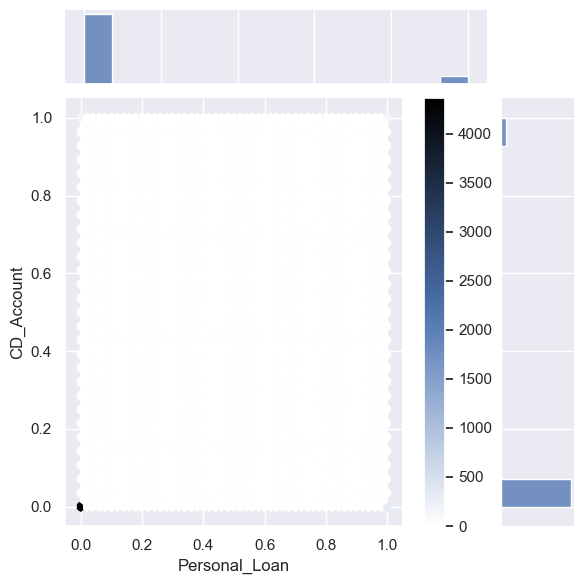

<IPython.core.display.Javascript object>

In [70]:
sns.jointplot(data=df, x="Personal_Loan", y="CD_Account", kind="hex")
plt.colorbar()

<AxesSubplot:xlabel='Personal_Loan', ylabel='Income'>

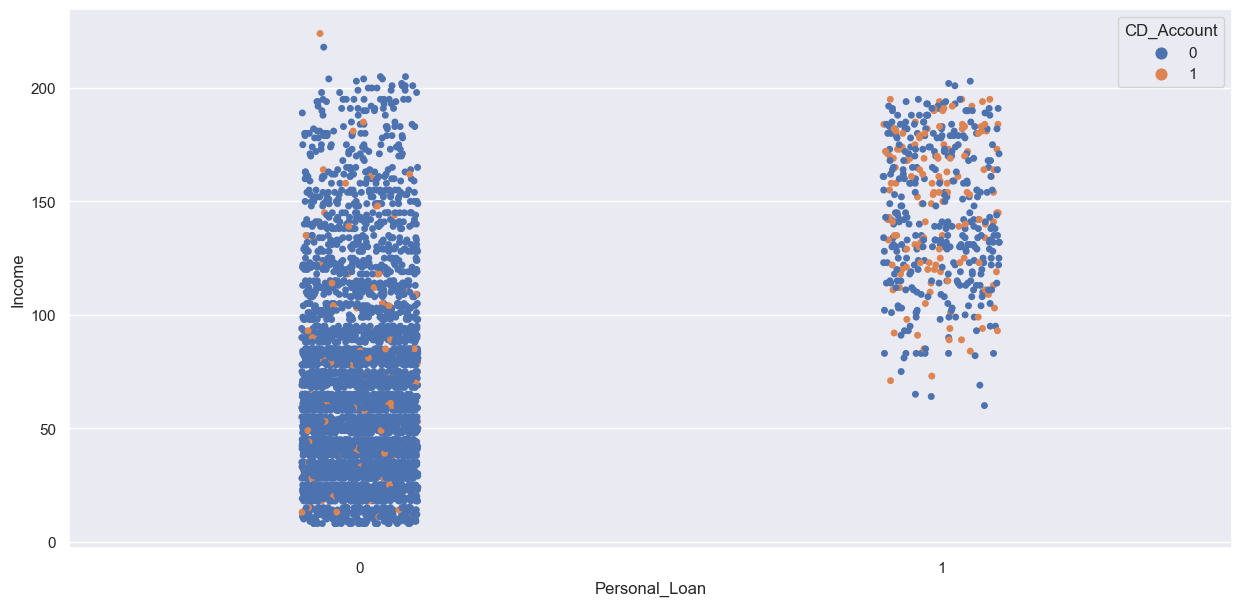

<IPython.core.display.Javascript object>

In [71]:
plt.figure(figsize=(15, 7))
sns.stripplot(data=df, x="Personal_Loan", y="Income", hue="CD_Account", jitter=True)

<AxesSubplot:xlabel='Personal_Loan', ylabel='Income'>

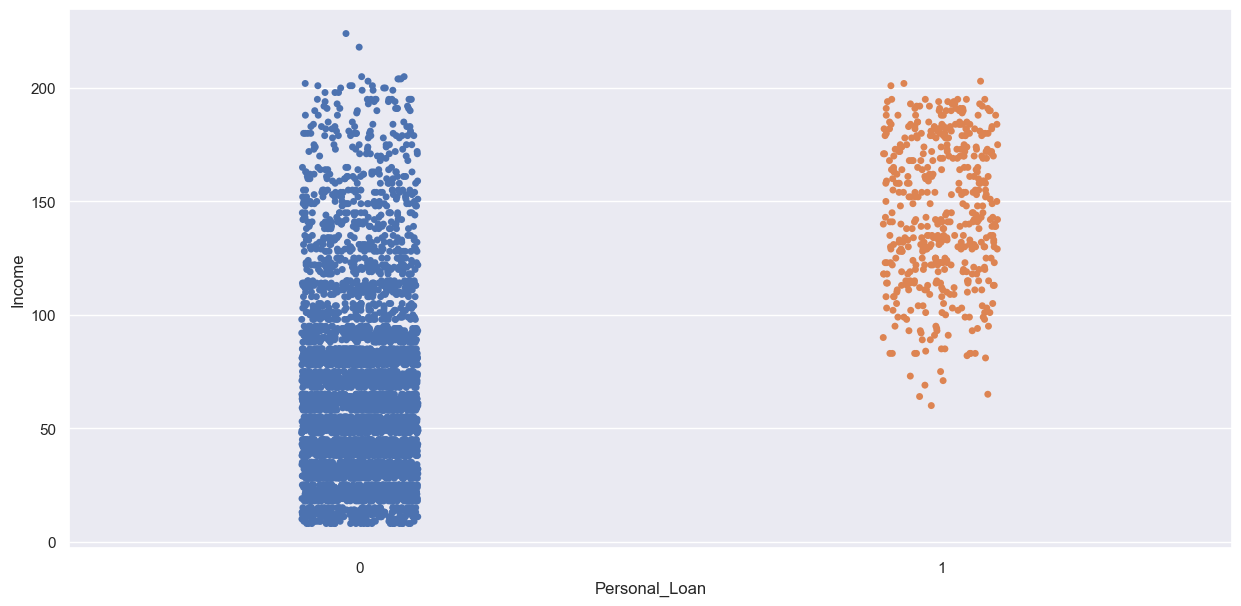

<IPython.core.display.Javascript object>

In [72]:
plt.figure(figsize=(15, 7))
sns.stripplot(data=df, x="Personal_Loan", y="Income", jitter=True)

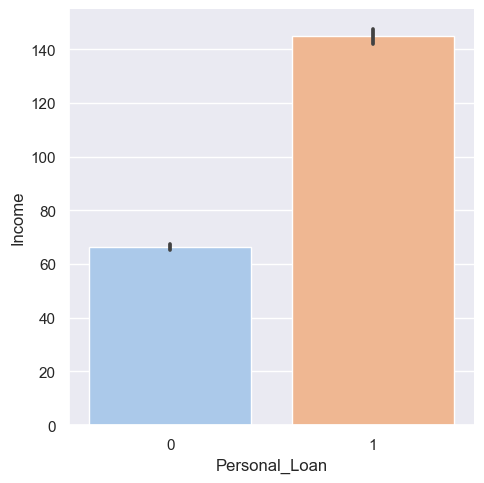

<IPython.core.display.Javascript object>

In [73]:
sns.catplot(
    data=df,
    x="Personal_Loan",
    y="Income",
    kind="bar",
    palette="pastel",
)

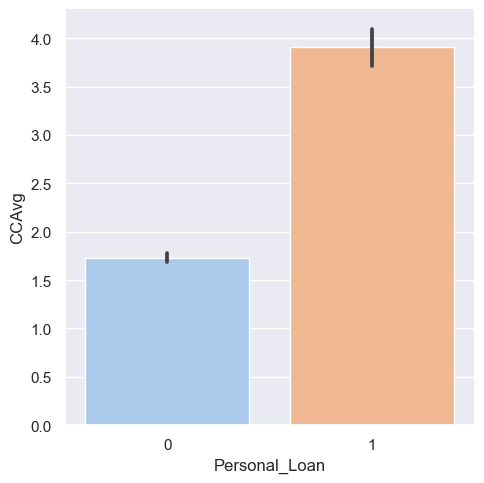

<IPython.core.display.Javascript object>

In [74]:
sns.catplot(
    data=df,
    x="Personal_Loan",
    y="CCAvg",
    kind="bar",
    palette="pastel",
)

<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

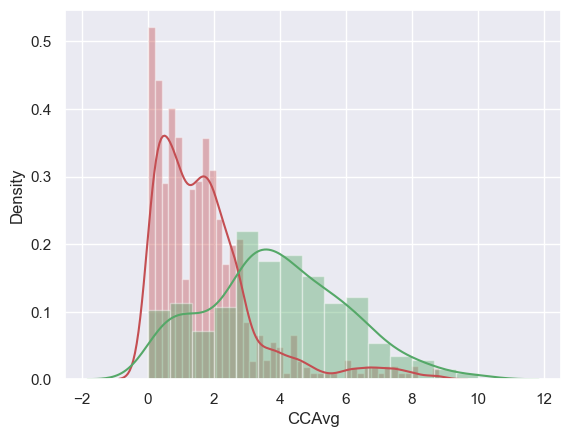

<IPython.core.display.Javascript object>

In [75]:
sns.distplot(data[df.Personal_Loan == 0]["CCAvg"], color="r")
sns.distplot(data[df.Personal_Loan == 1]["CCAvg"], color="g")

In [76]:
print(
    "Credit card spending of Non-Loan customers: ",
    data[df.Personal_Loan == 0]["CCAvg"].median() * 1000,
)
print(
    "Credit card spending of Loan customers    : ",
    data[df.Personal_Loan == 1]["CCAvg"].median() * 1000,
)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


<IPython.core.display.Javascript object>

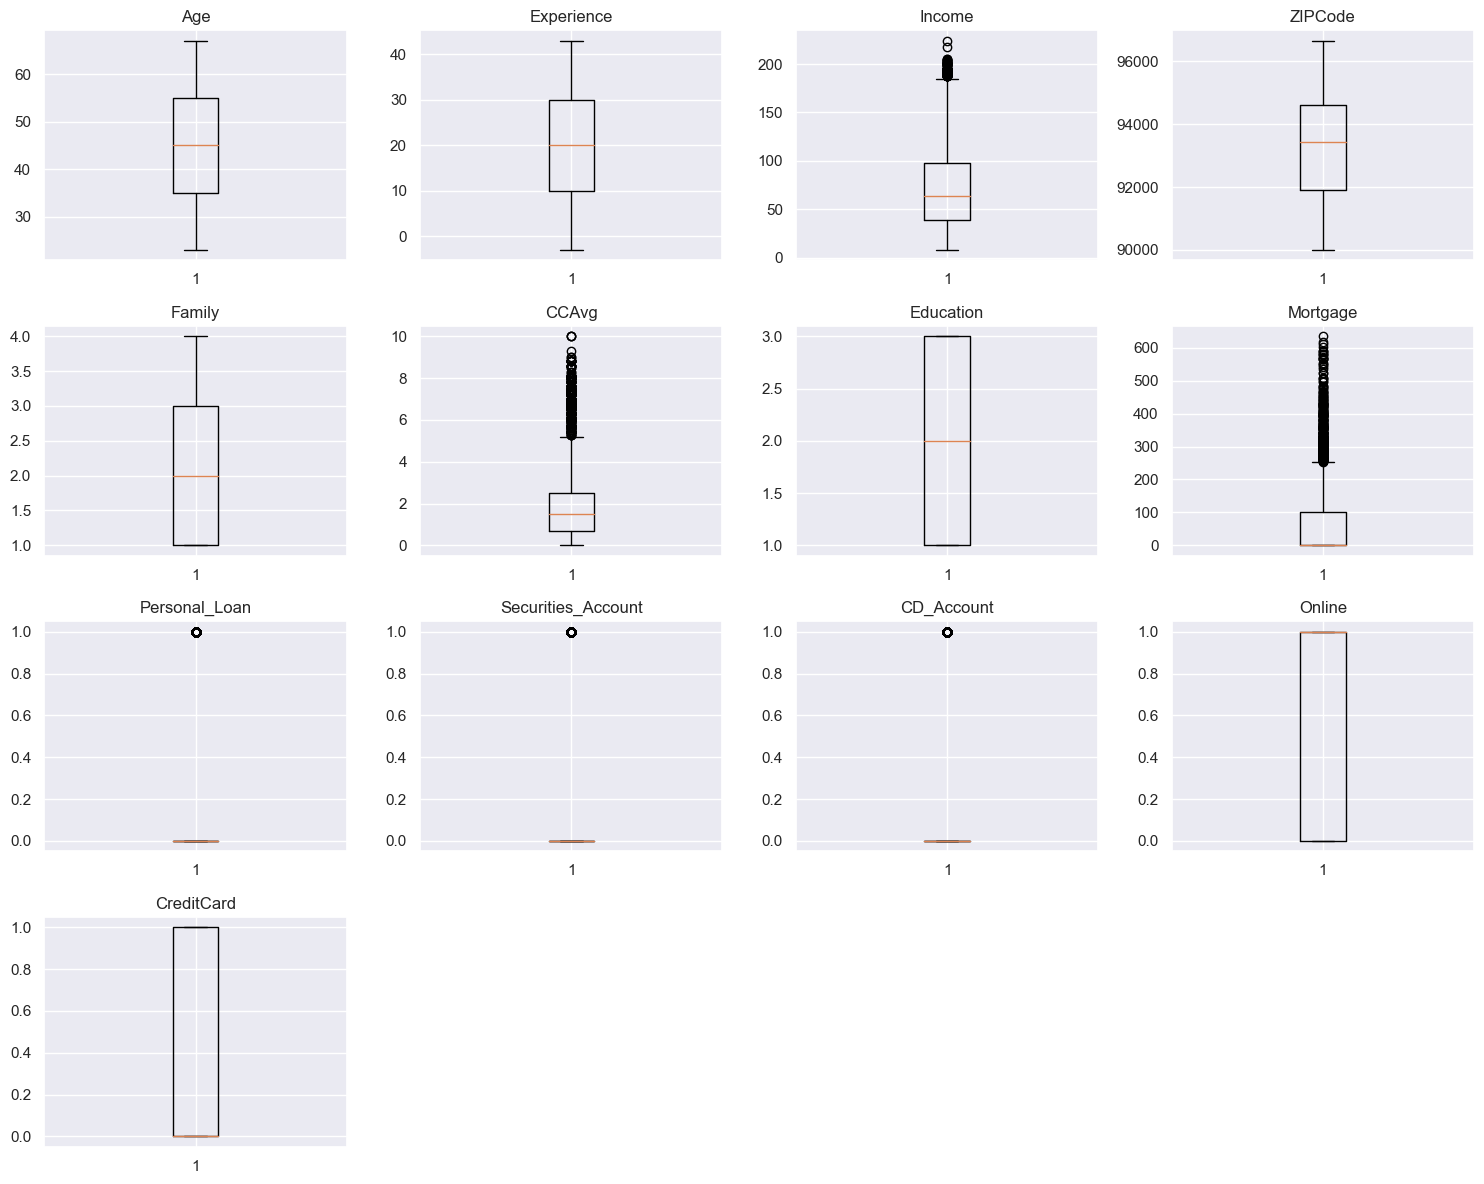

<IPython.core.display.Javascript object>

In [77]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

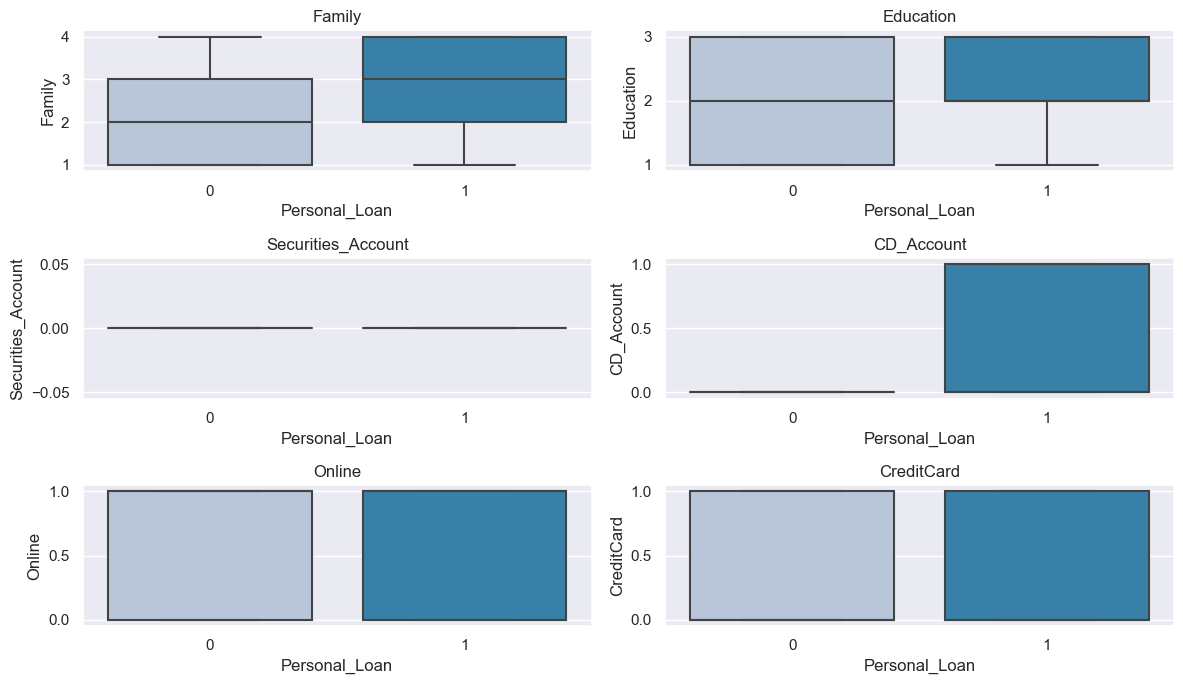

<IPython.core.display.Javascript object>

In [78]:
cols = data[
    [
        "Family",
        "Education",
        "Securities_Account",
        "CD_Account",
        "Online",
        "CreditCard",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Personal_Loan"], data[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

**Bivariate Analysis**

In [79]:
df.corr()

Age  Experience  Income  ZIPCode  Family  CCAvg  \
Age                 1.000       0.994  -0.055   -0.031  -0.046 -0.052   
Experience          0.994       1.000  -0.047   -0.031  -0.052 -0.050   
Income             -0.055      -0.047   1.000   -0.031  -0.158  0.646   
ZIPCode            -0.031      -0.031  -0.031    1.000   0.028 -0.012   
Family             -0.046      -0.052  -0.158    0.028   1.000 -0.109   
CCAvg              -0.052      -0.050   0.646   -0.012  -0.109  1.000   
Education           0.041       0.014  -0.188   -0.008   0.065 -0.136   
Mortgage           -0.013      -0.011   0.207    0.004  -0.020  0.110   
Personal_Loan      -0.008      -0.008   0.502   -0.003   0.061  0.367   
Securities_Account -0.000      -0.001  -0.003    0.002   0.020  0.015   
CD_Account          0.008       0.010   0.170    0.022   0.014  0.137   
Online              0.014       0.014   0.014    0.028   0.010 -0.004   
CreditCard          0.008       0.009  -0.002    0.024   0.012 -0.007   

                    Education  Mortgage  Personal_Loan  Securities_Account  \
Age                     0.041    -0.013         -0.008              -0.000   
Experience              0.014    -0.011         -0.008              -0.001   
Income                 -0.188     0.207          0.502              -0.003   
ZIPCode                -0.008     0.004         -0.003               0.002   
Family                  0.065    -0.020          0.061               0.020   
CCAvg                  -0.136     0.110          0.367               0.015   
Education               1.000    -0.033          0.137              -0.011   
Mortgage               -0.033     1.000          0.142              -0.005   
Personal_Loan           0.137     0.142          1.000               0.022   
Securities_Account     -0.011    -0.005          0.022               1.000   
CD_Account              0.014     0.089          0.316               0.317   
Online                 -0.015    -0.006          0.006               0.013   
CreditCard             -0.011    -0.007          0.003              -0.015   

                    CD_Account  Online  CreditCard  
Age                      0.008   0.014       0.008  
Experience               0.010   0.014       0.009  
Income                   0.170   0.014      -0.002  
ZIPCode                  0.022   0.028       0.024  
Family                   0.014   0.010       0.012  
CCAvg                    0.137  -0.004      -0.007  
Education                0.014  -0.015      -0.011  
Mortgage                 0.089  -0.006      -0.007  
Personal_Loan            0.316   0.006       0.003  
Securities_Account       0.317   0.013      -0.015  
CD_Account               1.000   0.176       0.279  
Online                   0.176   1.000       0.004  
CreditCard               0.279   0.004       1.000

<IPython.core.display.Javascript object>

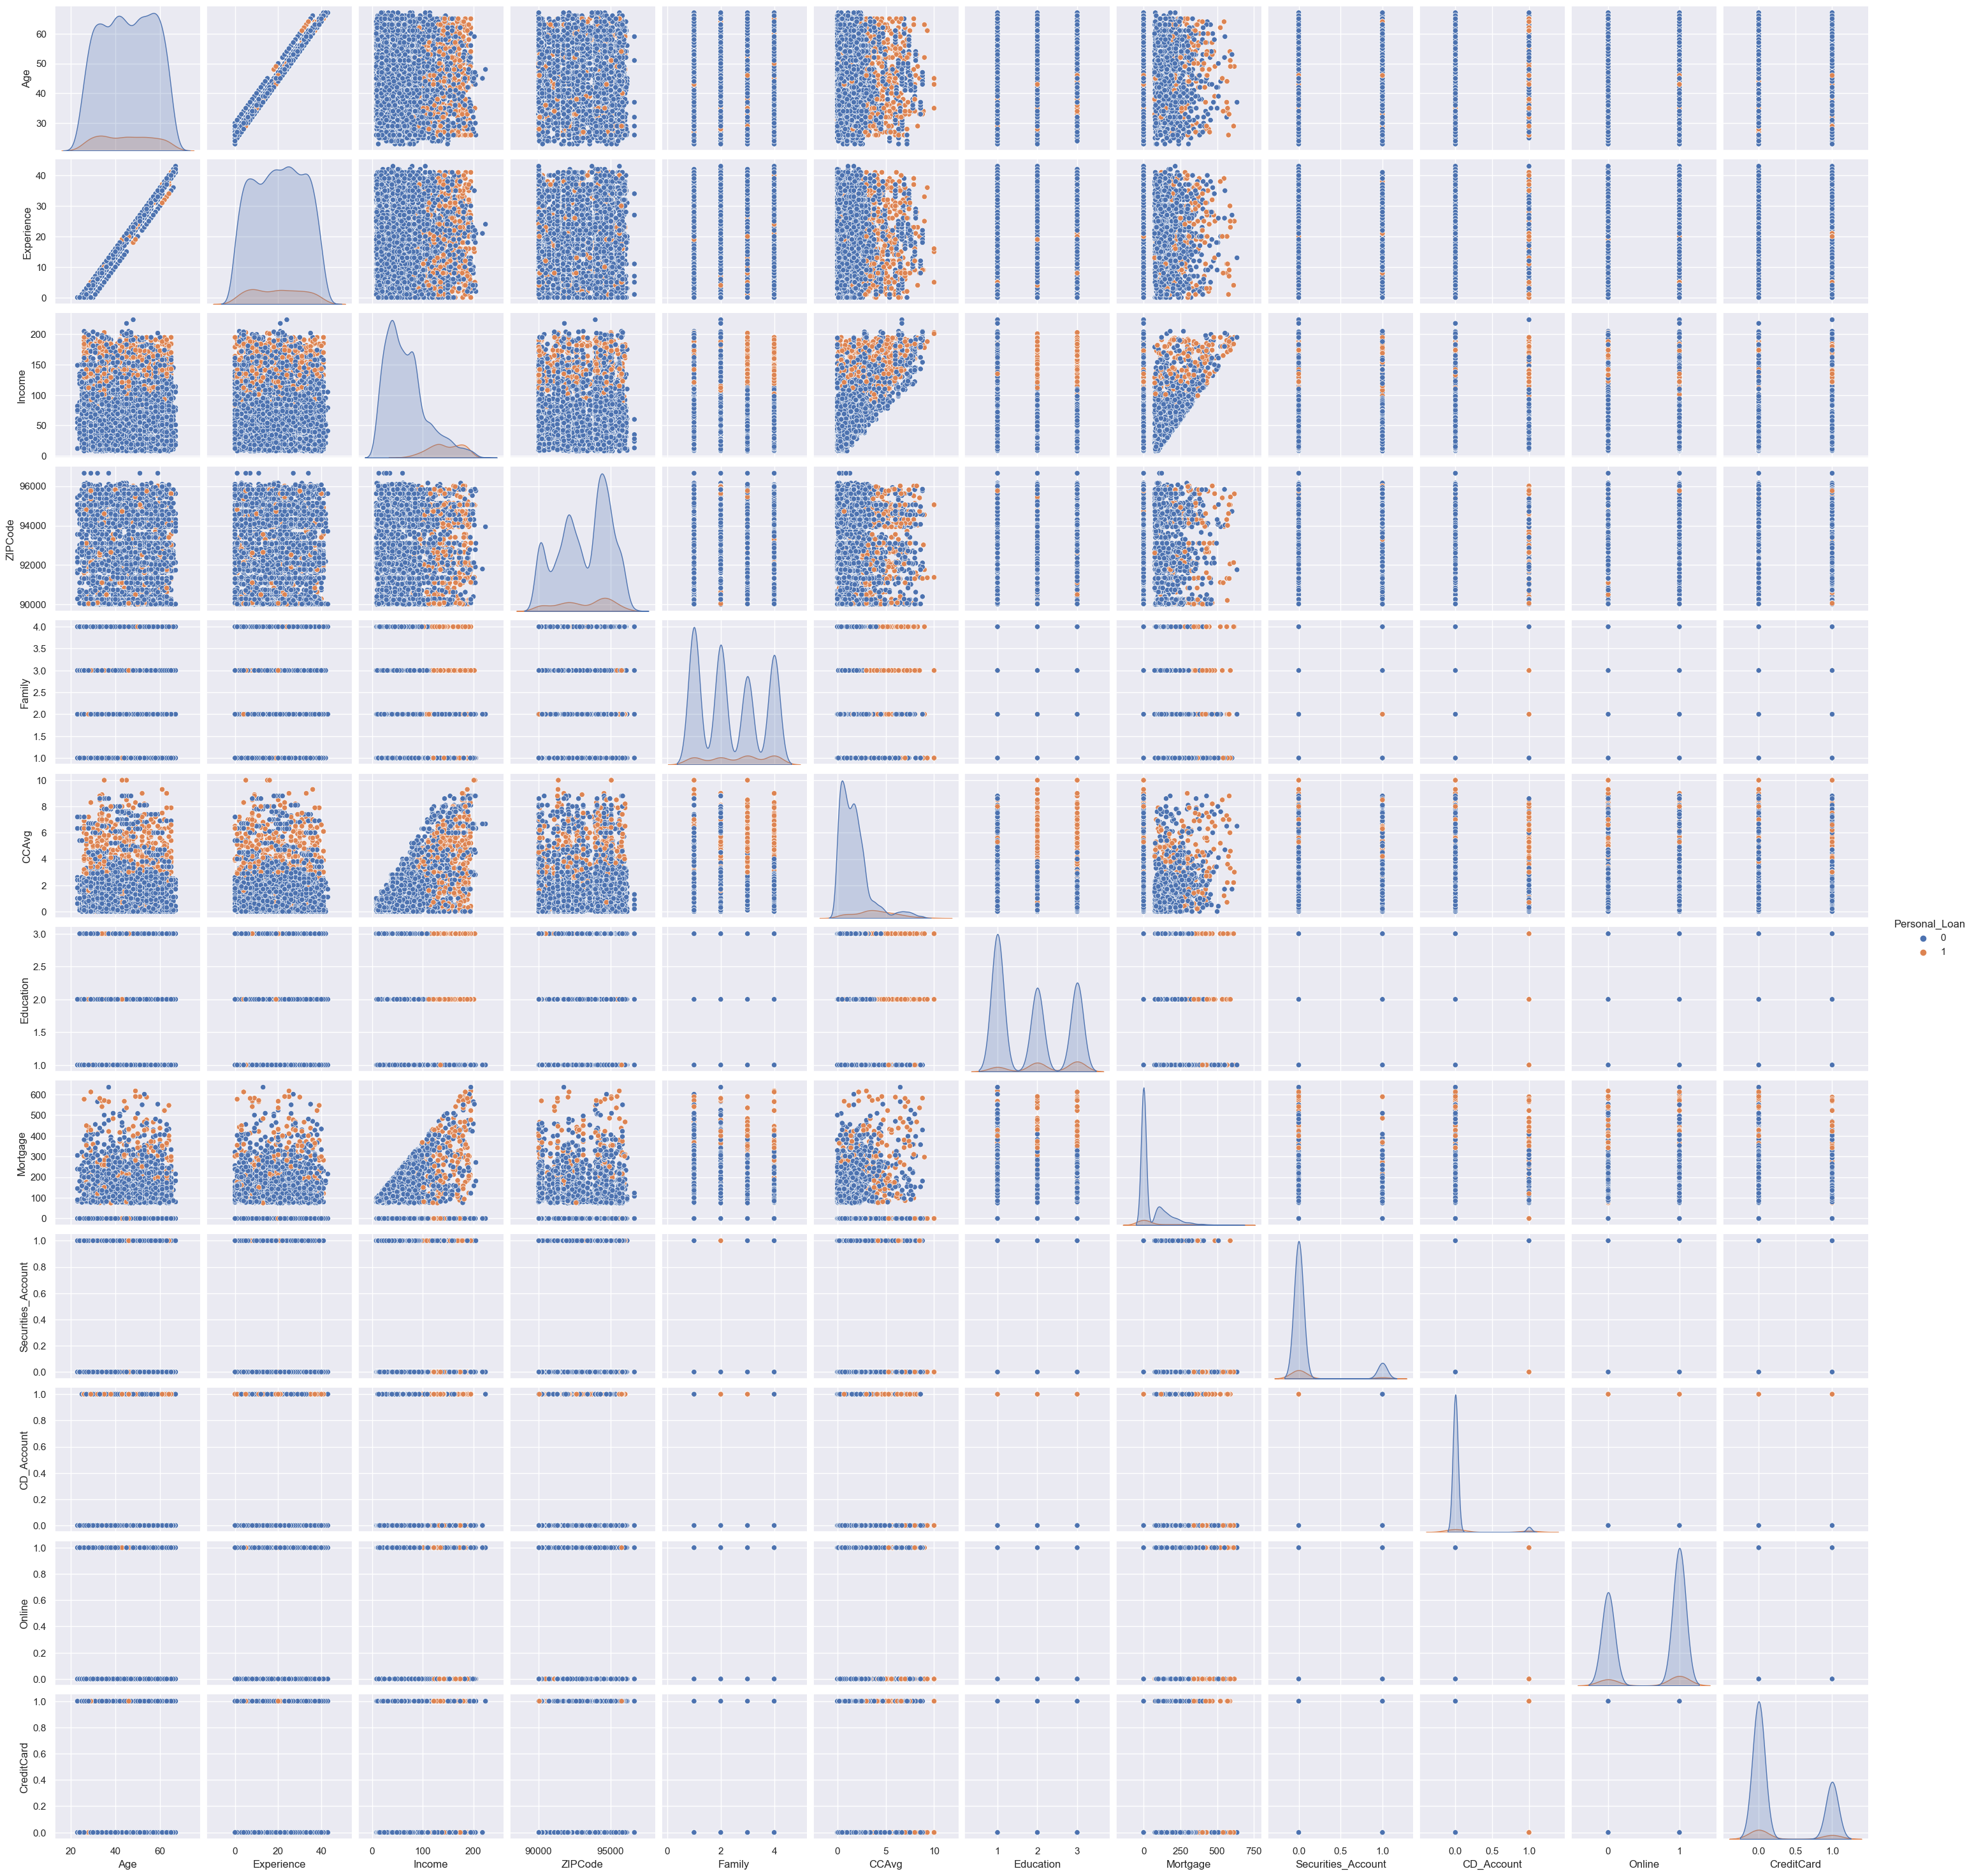

<IPython.core.display.Javascript object>

In [80]:
sns.pairplot(data=df, hue="Personal_Loan")
plt.show()

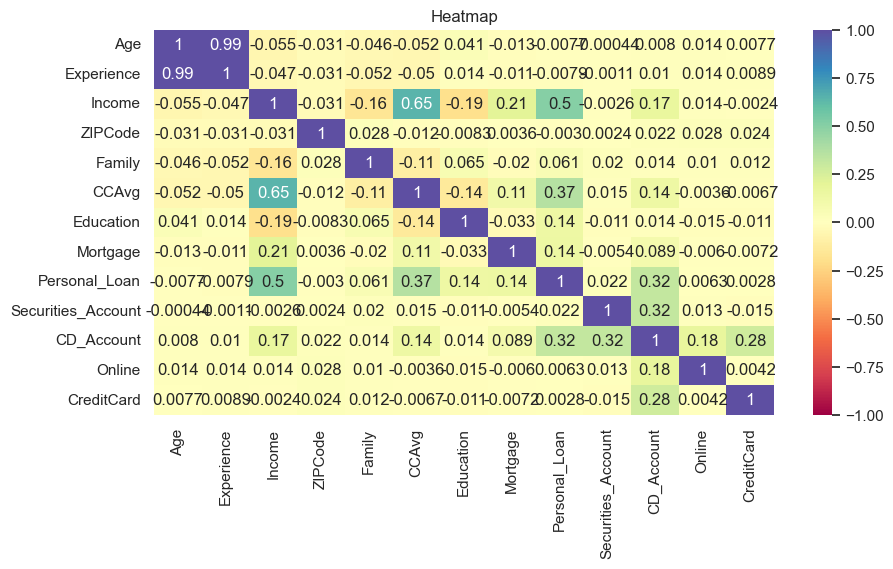

<IPython.core.display.Javascript object>

In [81]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap="Spectral", vmin=-1, vmax=1)
plt.title("Heatmap")
plt.show()

**EDA Insights**

* Age and Experince are normally distributed with majority aging between 30 to 60 years. 

* Income is right skewed with outliers. Majority of the customers have income between 45K and 55K.

* Monthly Credict card spend is higly right skewed with outliers. Average spending is between $0 to $10,000 per month. Persons spending < $2,500/month on credit cards are less likley to have perosnal loan. 

* Nearly 70% of persons has Mortgage less than 40K. Mortage is highly right skewed with outliers and at $635,000

* The variables family and education are ordinal variables. The distribution of families is evenly distributes

* It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

* Customers who does not have persoanl loan are most likley to have securities account. 

* Families with 3 are more and just 1 are more likely to take personal loan in comparison to other family members size.

* Most likley if customers who doesn't have Current Desposit account, most likley doesn't have perosnal loan. But most customers with current deposit account has personal loan. 

* Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. 

* Age and Experience have a positive correlation. As Age increases experience also increases.

* Yearly income and average monthly credit card spending has moderate positive correlation.

### Treating Outliers and Data Preparation for Modeling

In [82]:
df.drop(["ZIPCode"], axis=1, inplace=True)
df.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4  1.600          1         0              0   
1   45          19      34       3  1.500          1         0              0   
2   39          15      11       1  1.000          1         0              0   
3   35           9     100       1  2.700          2         0              0   
4   35           8      45       4  1.000          2         0              0   

   Securities_Account  CD_Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

<IPython.core.display.Javascript object>

**log Transformation of Mortgage and CCAvg**

Unfortunately as there are some non-positive values (in this case, exact zeros) so we can't directly take the log of Mortgage and CCAvg.

Ww have couple of options. 
One is to just add some small positive value to every element of these columns. We could just add $1$ since $1$ is tiny compared to the amounts described by these variables, so we're not changing the data in a meaningful way.

Other options are to use a power like `sqrt` which is like a weaker log transform but it can handle zeros. Another option is to use `np.arcsinh` which is like the log for large values but handles negative and zero values as well.

In [83]:
df["CCAvg_log"] = np.arcsinh(df["CCAvg"] + 1)
df["Mortgage_log"] = np.log(df["Mortgage"] + 1)

# df["CCAvg_sqrt"] = np.sqrt(df["CCAvg"])
# df["Mortgage_sqrt"] = np.sqrt(df["Mortgage"])

df.drop(["CCAvg"], axis=1, inplace=True)
df.drop(["Mortgage"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [84]:
df.head()

Age  Experience  Income  Family  Education  Personal_Loan  \
0   25           1      49       4          1              0   
1   45          19      34       3          1              0   
2   39          15      11       1          1              0   
3   35           9     100       1          2              0   
4   35           8      45       4          2              0   

   Securities_Account  CD_Account  Online  CreditCard  CCAvg_log  Mortgage_log  
0                   1           0       0           0      1.684         0.000  
1                   1           0       0           0      1.647         0.000  
2                   0           0       0           0      1.444         0.000  
3                   0           0       0           0      2.019         0.000  
4                   0           0       0           1      1.444         0.000

<IPython.core.display.Javascript object>

In [85]:
X = df.drop("Personal_Loan", axis=1)  # Features
y = df["Personal_Loan"]  # Labels (Target Variable)
# converting target to integers - since some functions might not work with bool type

<IPython.core.display.Javascript object>

**Encoding X data**

* Encoding is NOT required as there is no Categorical data. 

In [86]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 11) (1500, 11)


<IPython.core.display.Javascript object>

In [87]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


<IPython.core.display.Javascript object>

In [88]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True) * 100)
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True) * 100)

Percentage of classes in training set:
0   90.543
1    9.457
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0   90.067
1    9.933
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

### Logistic Regression

**Model evaluation criterion**

**Model can make wrong predictions as:**
* Model predicting a person HAS personal loan but in reality it's NOT the case. False Positive
* Model predicting a person DOESN'T have personal loan but in reality person has personal loan. False Negative.

**Which case is more important?** 
* Both the cases are important as:

* If we predict a person HAS personal loan but in reality if the person has NO personal loan, then it's missed marketing opperutnity. No increase in business objective

* If we predict a person DOESN'T have personal loan but in reality if the person HAS personal loan, then it's wasted marketing resources. No increase in business objective


**How to reduce this loss i.e need to reduce False Negatives and False Negatives?**
* Since both False Positive (Precision) and Flase Negative (Recall) are important ***F1_score*** should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

**functions to calculate different metrics and confusion matrix**

In [89]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


<IPython.core.display.Javascript object>

In [90]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [91]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

**Checking Model's performance on Train data - Logistic Regression**

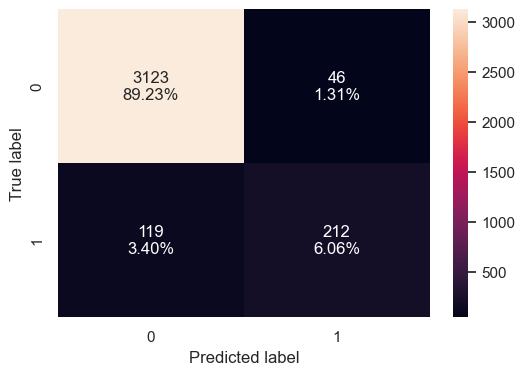

<IPython.core.display.Javascript object>

In [92]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [93]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision    F1
0     0.953   0.640      0.822 0.720

<IPython.core.display.Javascript object>

**Checking Model's performance on Test data - Logistic Regression**

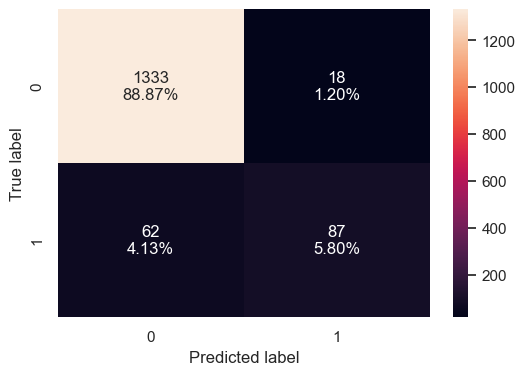

<IPython.core.display.Javascript object>

In [94]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [95]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


Accuracy  Recall  Precision    F1
0     0.947   0.584      0.829 0.685

<IPython.core.display.Javascript object>

**ROC-AUC**

* The area under the ROC curve (AUC) is a measure of how good a model is - The higher the AUC, the better the model is, at distinguishing between classes.


**1. roc_curve_score** 

Returns the auc scores

**Input**: 
         1. Training data
         2. Predicted Probability
         
**Output**: AUC scores between 0 and 1
 
**2. roc_curve**

Returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.
 
**Input:** 
        1. Training data
        2. Predicted Probability
        
**Output:** False positive rate, true positive rate and threshold values

* ROC-AUC on training set

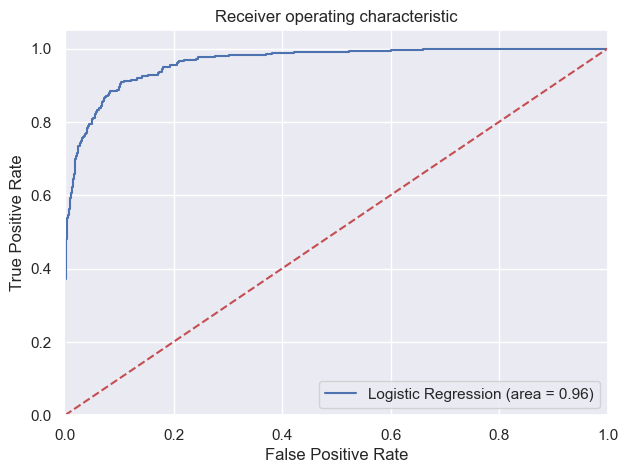

<IPython.core.display.Javascript object>

In [96]:
# Find the roc auc score for training data
logit_roc_auc_train = roc_auc_score(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

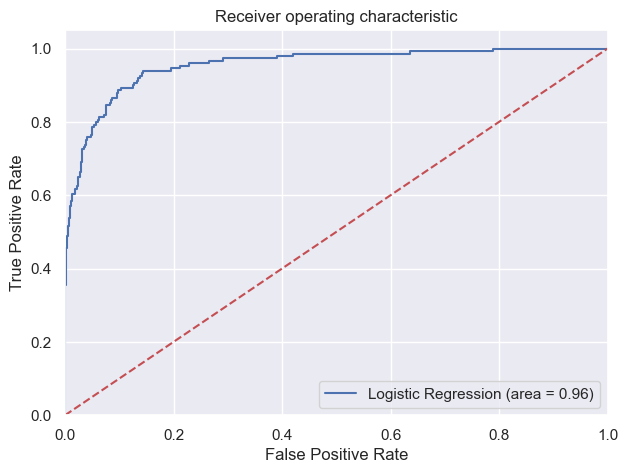

<IPython.core.display.Javascript object>

In [97]:
# Find the roc auc score for training data
logit_roc_auc_test = roc_auc_score(
    y_test, lg.predict_proba(X_test)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Model is giving a generalized performance.

**Model Performance Improvement**
* Checking if the F1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

**Optimal threshold using AUC-ROC curve**

* Optimal thresold is the value that best separated the True positive rate and False positive rate. 


In [98]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
# roc_curve returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.
fpr, tpr, thresholds = roc_curve(
    y_train, lg.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1

optimal_idx = np.argmax(
    tpr - fpr
)  # Finds the index that contains the max difference between tpr and fpr
optimal_threshold_auc_roc = thresholds[
    optimal_idx
]  # stores the optimal threshold value
print(optimal_threshold_auc_roc)

0.0968564092569187


<IPython.core.display.Javascript object>

**Checking model's performance on train data**

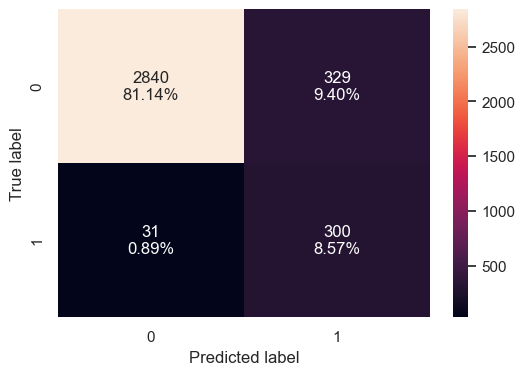

<IPython.core.display.Javascript object>

In [99]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [100]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_train, y_train, threshold=optimal_threshold_auc_roc
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision    F1
0     0.897   0.906      0.477 0.625

<IPython.core.display.Javascript object>

**Checking model's performance on test data**

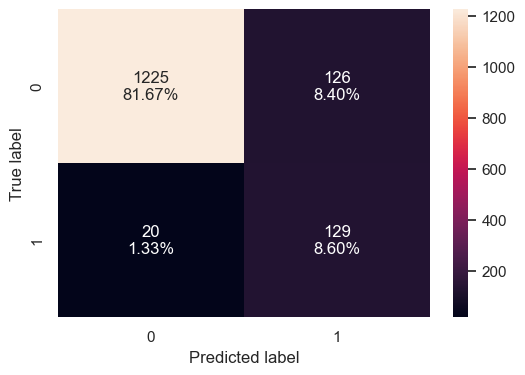

<IPython.core.display.Javascript object>

In [101]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [102]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_test, y_test, threshold=optimal_threshold_auc_roc
    )
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


Accuracy  Recall  Precision    F1
0     0.903   0.866      0.506 0.639

<IPython.core.display.Javascript object>

**Let's use Precision-Recall curve and see if we can find a better threshold**

The Precision-Recall curve shows the tradeoff between Precision and Recall for different thresholds. It can be used to select optimal threshold as required to improve the model improvement. 

**precision_recall_curve()**

Returns the fpr, tpr and threshold values

**Input:** 
        1. Original data
        2. Predicted Probability
        
**Output:** False positive rate, true positive rate and threshold values

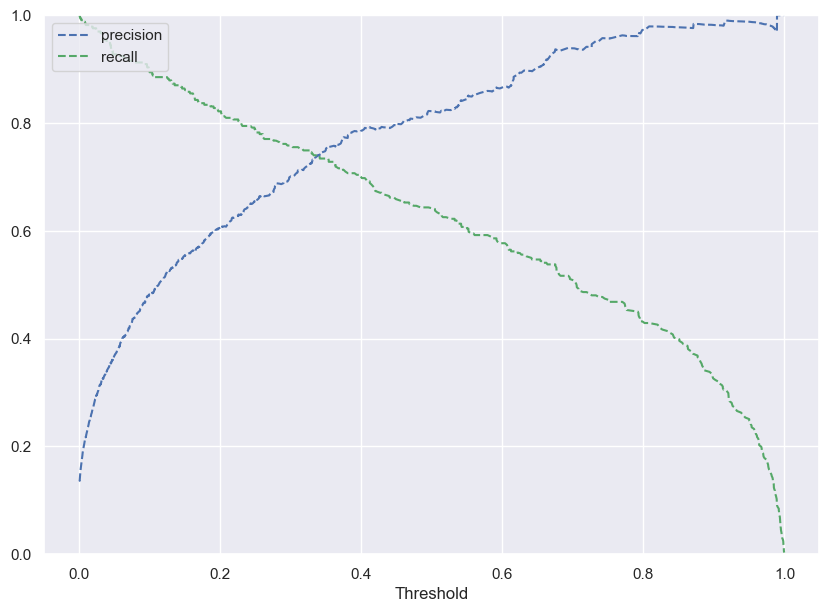

<IPython.core.display.Javascript object>

In [103]:
# Find the predicted probabilities for class 1
y_scores = lg.predict_proba(X_train)[:, 1]
# Find fpr, tpr and threshold values
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
# Plot recall precision curve
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [104]:
# setting the threshold
optimal_threshold_curve = 0.35

<IPython.core.display.Javascript object>

**Checking model's performance on train data**

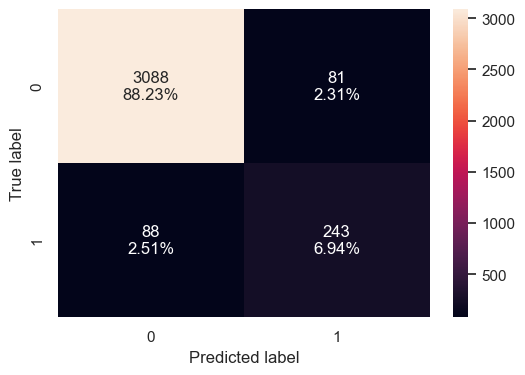

<IPython.core.display.Javascript object>

In [105]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [106]:
log_reg_model_train_perf_threshold_curve = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_train, y_train, threshold=optimal_threshold_curve
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision    F1
0     0.952   0.734      0.750 0.742

<IPython.core.display.Javascript object>

**Checking model's performance on test data**

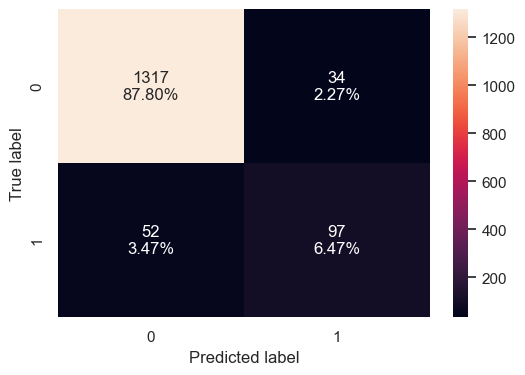

<IPython.core.display.Javascript object>

In [107]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [108]:
log_reg_model_test_perf_threshold_curve = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_test, y_test, threshold=optimal_threshold_curve
    )
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


Accuracy  Recall  Precision    F1
0     0.943   0.651      0.740 0.693

<IPython.core.display.Javascript object>

**Model Performance Summary**

In [109]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.10 Threshold",
    "Logistic Regression-0.35 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.10 Threshold  \
Accuracy                         0.953                               0.897   
Recall                           0.640                               0.906   
Precision                        0.822                               0.477   
F1                               0.720                               0.625   

           Logistic Regression-0.35 Threshold  
Accuracy                                0.952  
Recall                                  0.734  
Precision                               0.750  
F1                                      0.742

<IPython.core.display.Javascript object>

In [110]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.10 Threshold",
    "Logistic Regression-0.35 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.10 Threshold  \
Accuracy                         0.947                               0.903   
Recall                           0.584                               0.866   
Precision                        0.829                               0.506   
F1                               0.685                               0.639   

           Logistic Regression-0.35 Threshold  
Accuracy                                0.943  
Recall                                  0.651  
Precision                               0.740  
F1                                      0.693

<IPython.core.display.Javascript object>

**Logistic Regression Conclusion**

* At threshold = 0.35 Logistic regression model has a better F1 score in comparision

## Decision Trees

**Model evaluation criterion**

**Model can make wrong predictions as:**
* Model predicting a person HAS personal loan but in reality it's NOT the case. False Positive
* Model predicting a person DOESN'T have personal loan but in reality person has personal loan. False Negative.

**Which case is more important?** 
* Both the cases are important as:

* If we predict a person HAS personal loan but in reality if the person has NO personal loan, then it's a missed marketing opperutnity. No increase in business objective

* If we predict a person DOESN'T have personal loan but in reality if the person HAS personal loan, then it's wasted marketing resources. No increase in business objective


**How to reduce this loss i.e need to reduce False Negatives and False Negatives?**
* Since both False Positive (Precision) and Flase Negative (Recall) are important ***F1_score*** should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly

In [111]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [112]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [113]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

**Checking Model's performance on Train data**

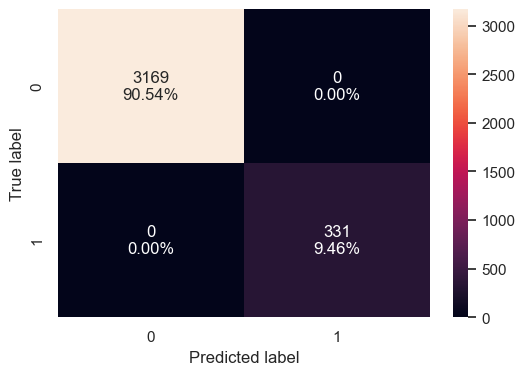

<IPython.core.display.Javascript object>

In [114]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [115]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

<IPython.core.display.Javascript object>

**Checking Model's performance on Test data**

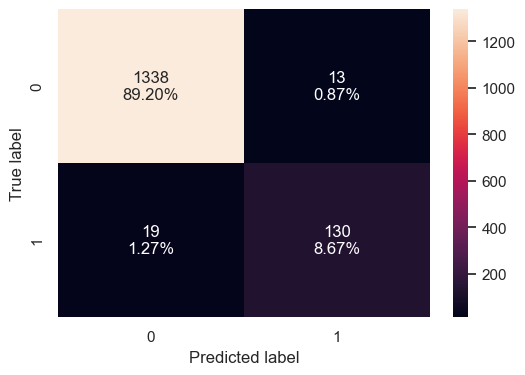

<IPython.core.display.Javascript object>

In [116]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [117]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

Accuracy  Recall  Precision    F1
0     0.979   0.872      0.909 0.890

<IPython.core.display.Javascript object>

### Decision Tree (with class_weights)

* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

In [118]:
model = DecisionTreeClassifier(
    criterion="gini", random_state=1, class_weight="balanced"
)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

**Checking Model's performance on Train data with balanced class weights**

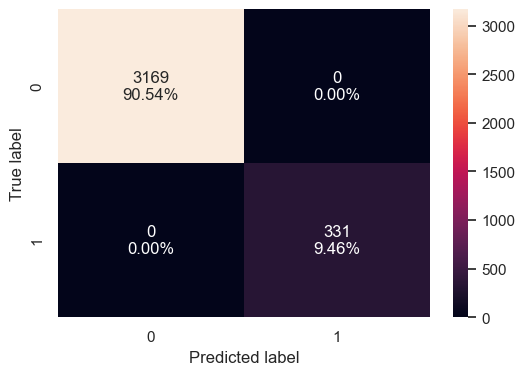

<IPython.core.display.Javascript object>

In [119]:
confusion_matrix_sklearn(model, X_train, y_train)

In [120]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

<IPython.core.display.Javascript object>

**Checking Model's performance on Test data with balanced class weights**

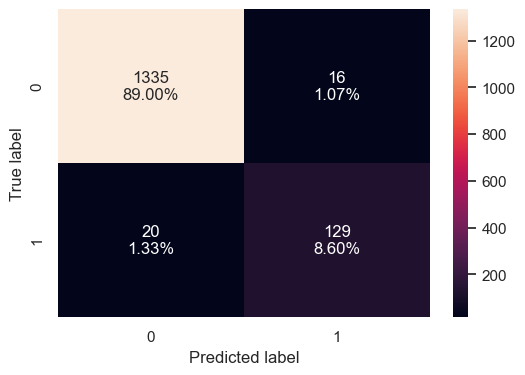

<IPython.core.display.Javascript object>

In [121]:
confusion_matrix_sklearn(model, X_test, y_test)

In [122]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy  Recall  Precision    F1
0     0.976   0.866      0.890 0.878

<IPython.core.display.Javascript object>

* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

## Visualizing the Decision Tree

In [123]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'CCAvg_log', 'Mortgage_log']


<IPython.core.display.Javascript object>

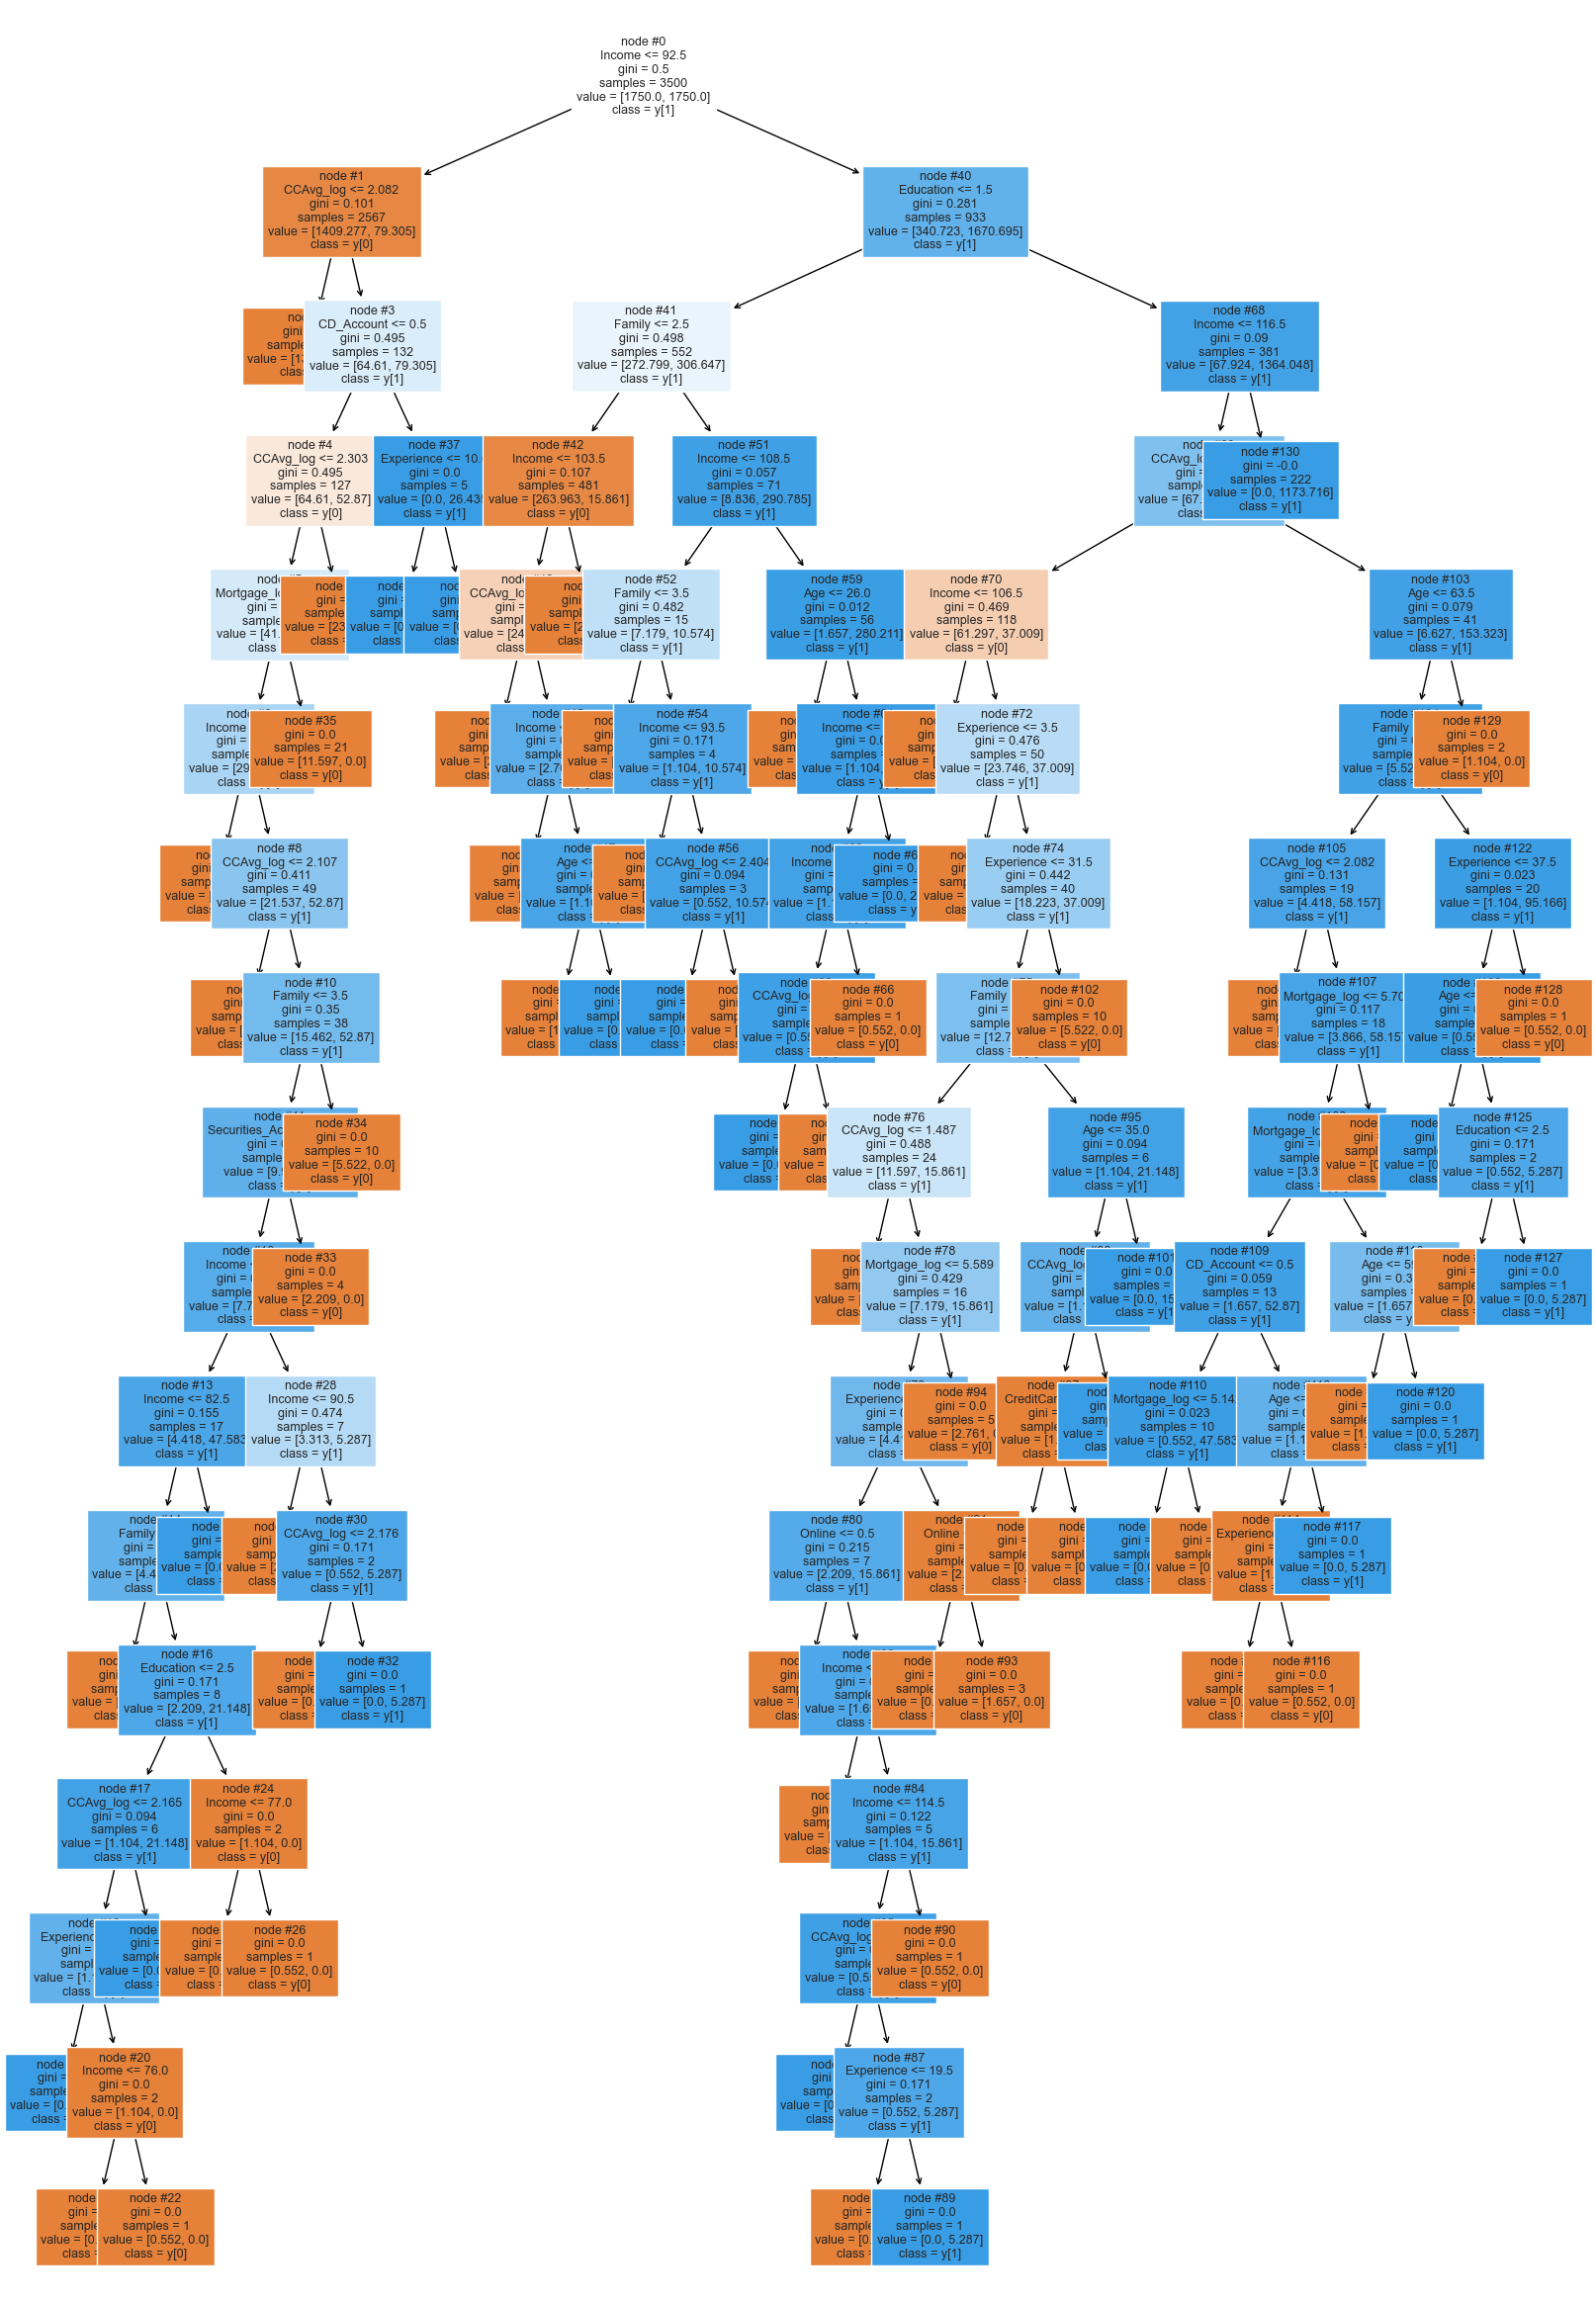

<IPython.core.display.Javascript object>

In [124]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [125]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg_log <= 2.08
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg_log >  2.08
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg_log <= 2.30
|   |   |   |   |--- Mortgage_log <= 4.64
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [8.28, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- CCAvg_log <= 2.11
|   |   |   |   |   |   |   |--- weights: [6.07, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg_log >  2.11
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |--- Income <= 84.00
|   |   |   |   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- Income >  82.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 26.44] class: 1
|   |   |   |   |   

<IPython.core.display.Javascript object>

In [126]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                     Imp
Income             0.637
Family             0.150
CCAvg_log          0.093
Education          0.086
Experience         0.010
Mortgage_log       0.008
CD_Account         0.008
Age                0.006
Securities_Account 0.002
Online             0.001
CreditCard         0.000


<IPython.core.display.Javascript object>

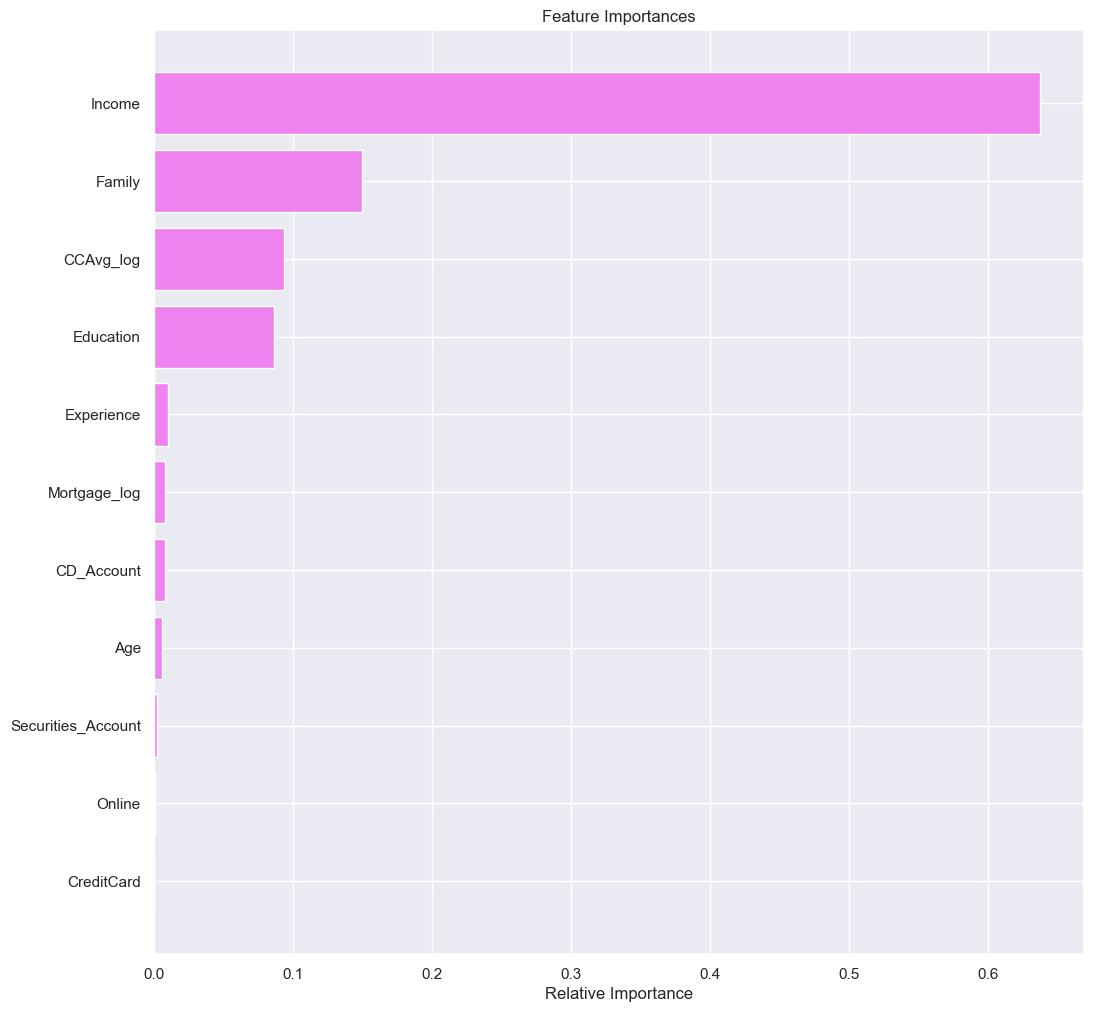

<IPython.core.display.Javascript object>

In [127]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.**
**Let's use pruning techniques to try and reduce overfitting.**

### Decision Tree (Pre-pruning)

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [128]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": [np.arange(2, 10, 2), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
    # "max_leaf_nodes": [50, 75, 150, 250],
    # "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', min_impurity_decrease=0.0001,
                       random_state=1)

<IPython.core.display.Javascript object>

**Checking Model's performance on Train data - Pre Pruning**

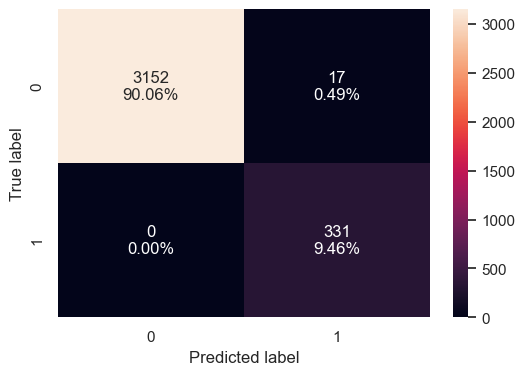

<IPython.core.display.Javascript object>

In [129]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [130]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision    F1
0     0.995   1.000      0.951 0.975

<IPython.core.display.Javascript object>

**Checking Model's performance on Test data - Pre Pruning**

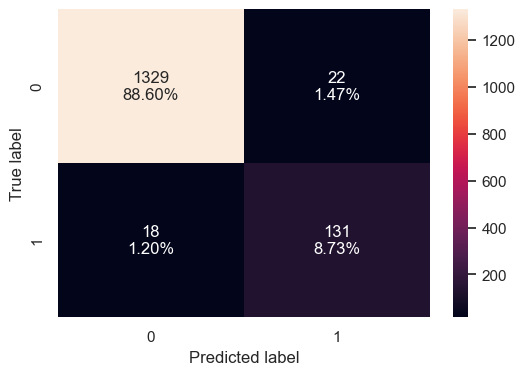

<IPython.core.display.Javascript object>

In [131]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [132]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

Accuracy  Recall  Precision    F1
0     0.973   0.879      0.856 0.868

<IPython.core.display.Javascript object>

## Visualizing the Decision Tree - Pre Pruning

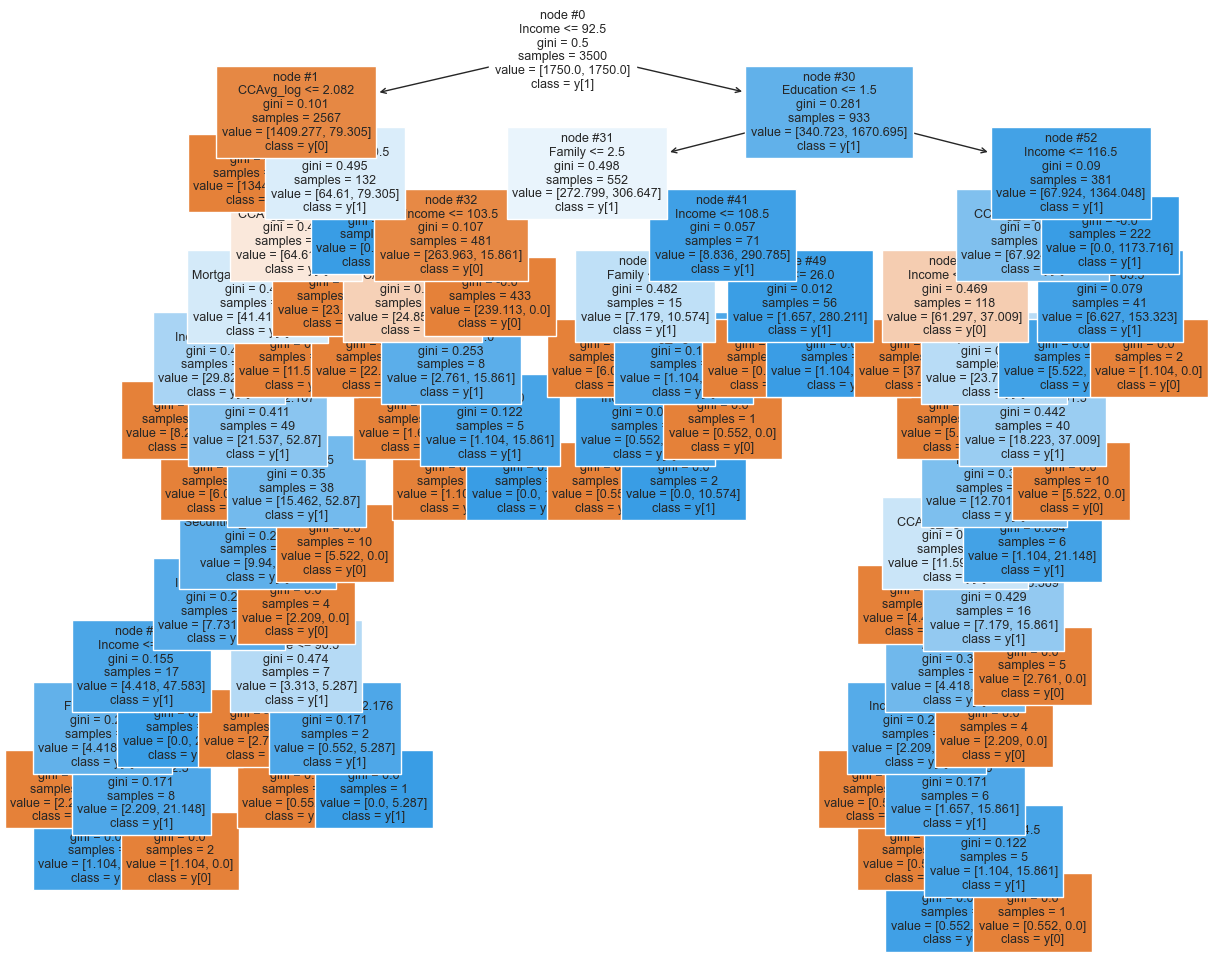

<IPython.core.display.Javascript object>

In [133]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

* We are getting a simplified tree after pre-pruning.

In [134]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg_log <= 2.08
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg_log >  2.08
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg_log <= 2.30
|   |   |   |   |--- Mortgage_log <= 4.64
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [8.28, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- CCAvg_log <= 2.11
|   |   |   |   |   |   |   |--- weights: [6.07, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg_log >  2.11
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |--- Income <= 84.00
|   |   |   |   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- Income >  82.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 26.44] class: 1
|   |   |   |   |   

<IPython.core.display.Javascript object>

In [135]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                     Imp
Income             0.644
Family             0.151
CCAvg_log          0.092
Education          0.086
CD_Account         0.008
Mortgage_log       0.007
Experience         0.006
Age                0.005
Securities_Account 0.002
Online             0.001
CreditCard         0.000


<IPython.core.display.Javascript object>

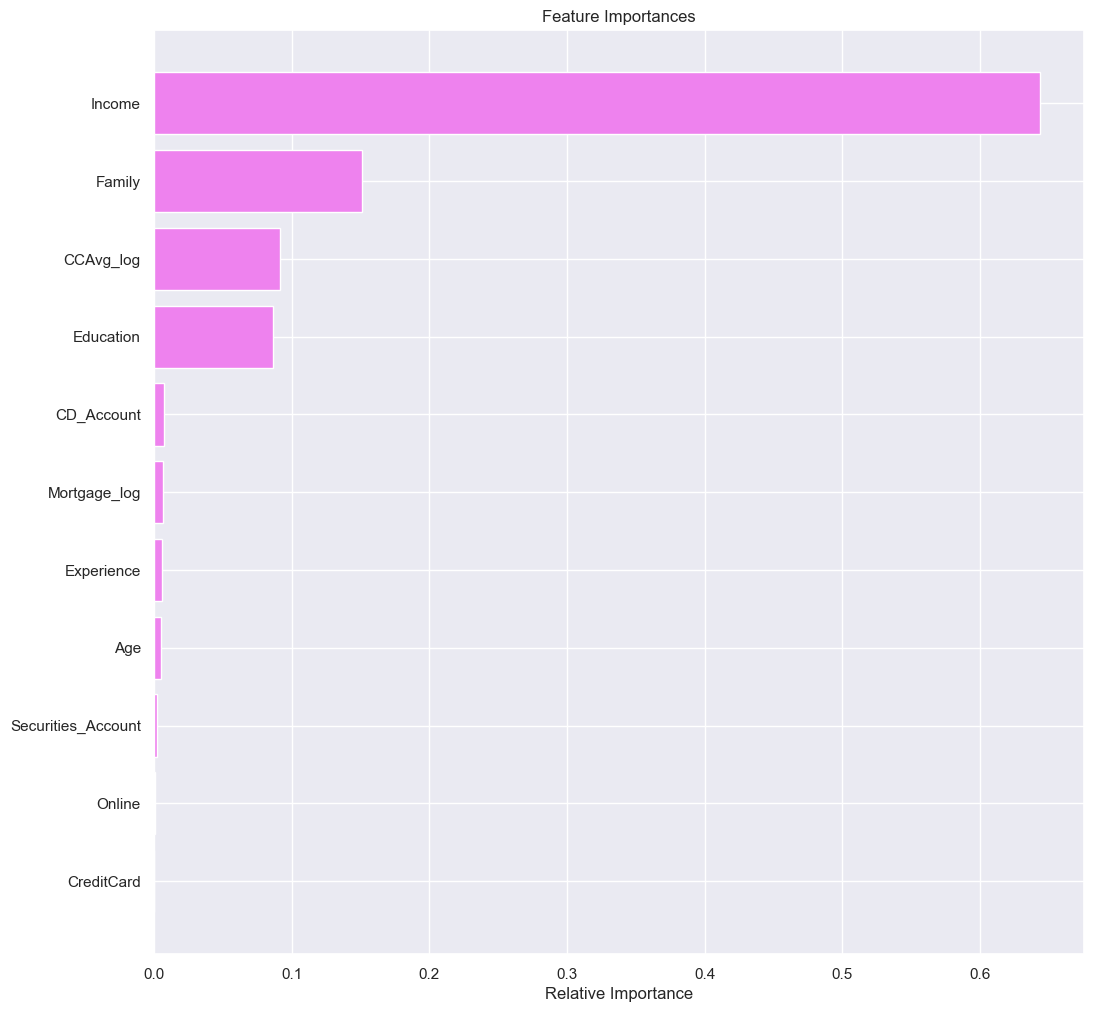

<IPython.core.display.Javascript object>

In [136]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Cost Complexity Pruning (Post Pruning)

As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [137]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [138]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.000      -0.000
1        0.000      -0.000
2        0.000      -0.000
3        0.000      -0.000
4        0.000      -0.000
5        0.000      -0.000
6        0.000      -0.000
7        0.000       0.000
8        0.000       0.001
9        0.000       0.001
10       0.000       0.002
11       0.000       0.002
12       0.000       0.003
13       0.000       0.004
14       0.000       0.004
15       0.000       0.007
16       0.000       0.007
17       0.001       0.008
18       0.001       0.009
19       0.001       0.009
20       0.001       0.010
21       0.001       0.011
22       0.001       0.012
23       0.001       0.014
24       0.001       0.015
25       0.001       0.017
26       0.001       0.020
27       0.002       0.023
28       0.002       0.027
29       0.002       0.029
30       0.002       0.031
31       0.003       0.035
32       0.004       0.042
33       0.004       0.046
34       0.005       0.051
35       0.010       0.071
36       0.023       0.093
37       0.056       0.205
38       0.295       0.500

<IPython.core.display.Javascript object>

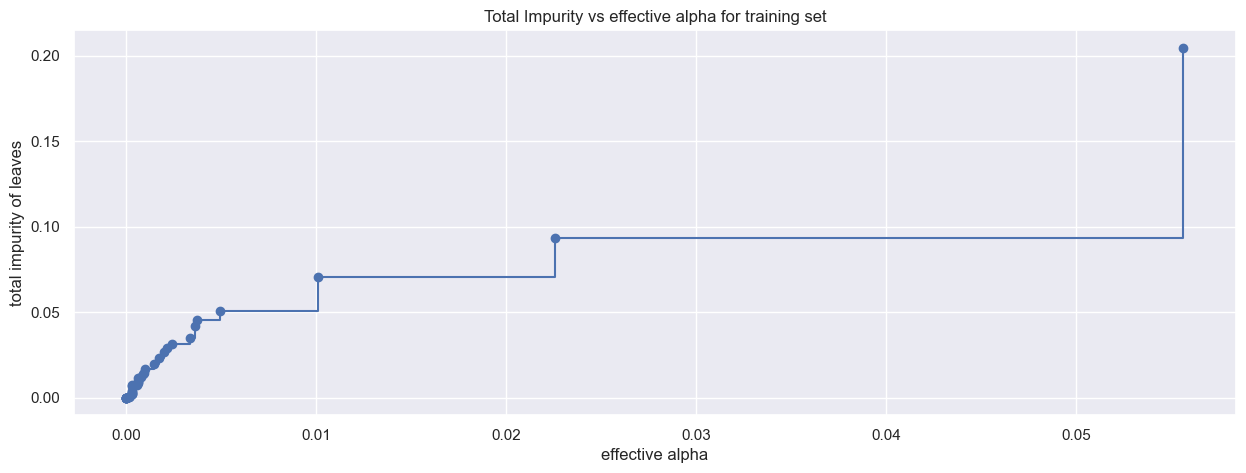

<IPython.core.display.Javascript object>

In [139]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Train a decision tree using the effective alphas. The last value in ``ccp_alphas`` is the alpha value that prunes the whole tree, leaving the tree, ``clfs[-1]``, with one node.

In [140]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29537927599923197


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

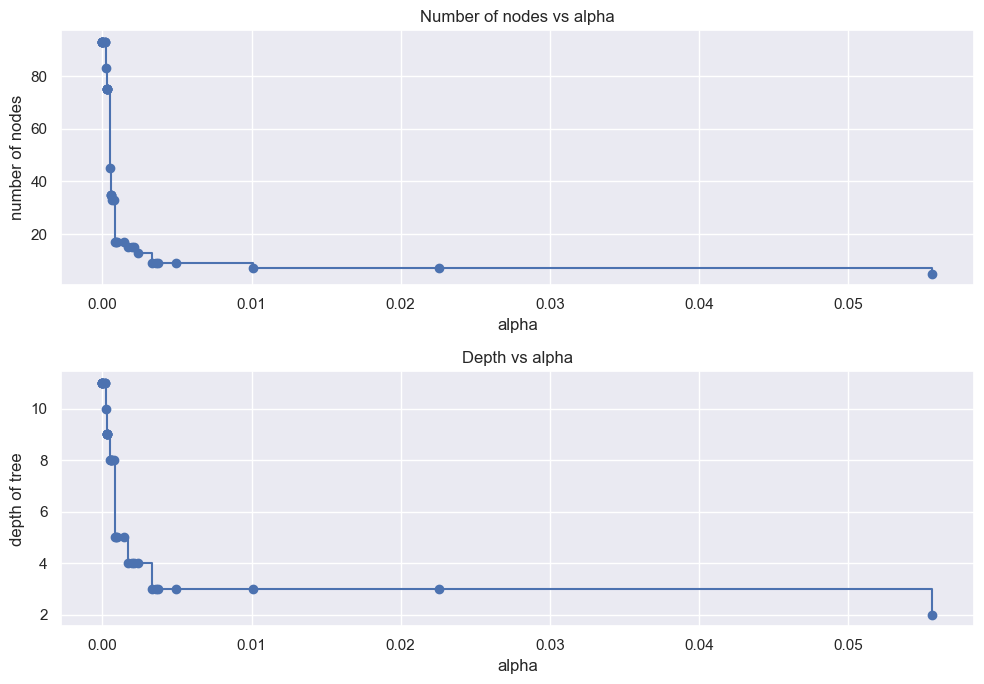

<IPython.core.display.Javascript object>

In [141]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [142]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [143]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [144]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

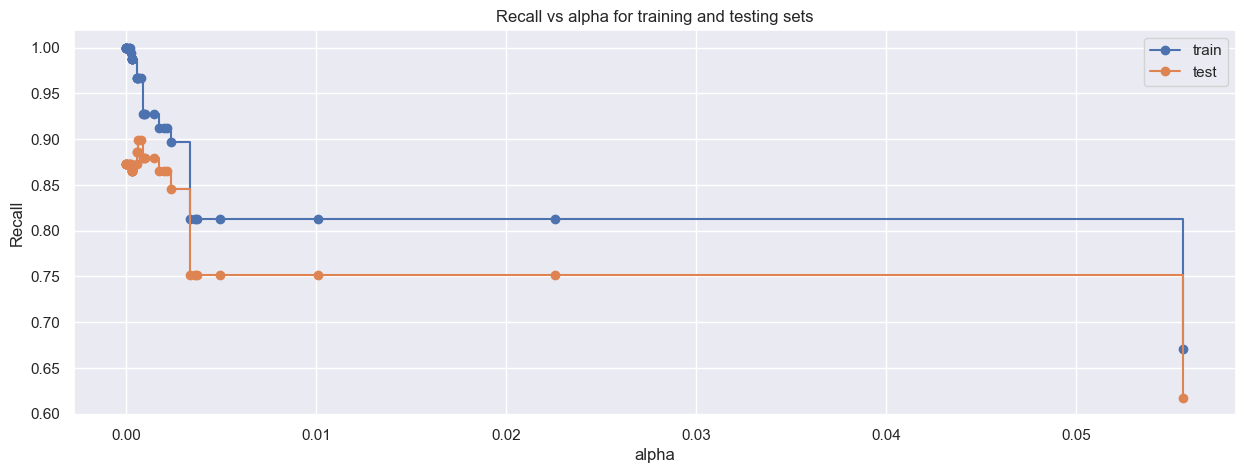

<IPython.core.display.Javascript object>

In [145]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.024 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.004 retaining information and getting higher recall.**

In [146]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006292496529471487, random_state=1)


<IPython.core.display.Javascript object>

In [147]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0006292496529471487, random_state=1)

<IPython.core.display.Javascript object>

**Checking Model's performance on train data**

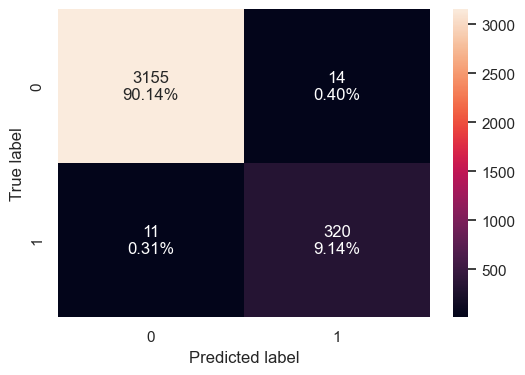

<IPython.core.display.Javascript object>

In [148]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [149]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy  Recall  Precision    F1
0     0.993   0.967      0.958 0.962

<IPython.core.display.Javascript object>

**Checking Model's performance on test data**

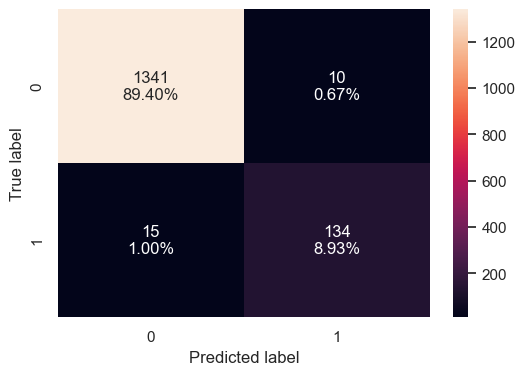

<IPython.core.display.Javascript object>

In [150]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [151]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test


Accuracy  Recall  Precision    F1
0     0.983   0.899      0.931 0.915

<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

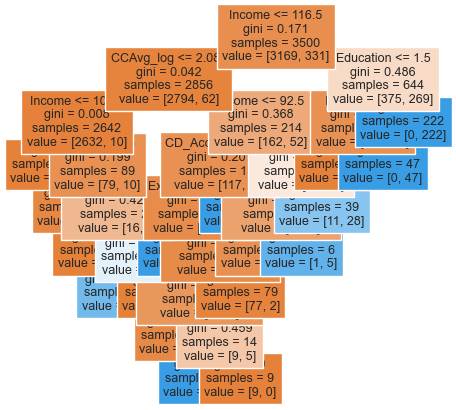

<IPython.core.display.Javascript object>

In [152]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

**Creating model with 0.002 ccp_alpha**

In [153]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.002, class_weight="balanced", random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

**Checking Model's performance on train data**

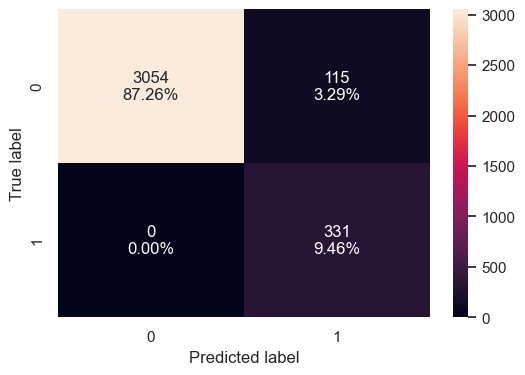

<IPython.core.display.Javascript object>

In [154]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [155]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model2, X_train, y_train
)
decision_tree_postpruned_perf_test


Accuracy  Recall  Precision    F1
0     0.967   1.000      0.742 0.852

<IPython.core.display.Javascript object>

**Checking Model's performance on test data**

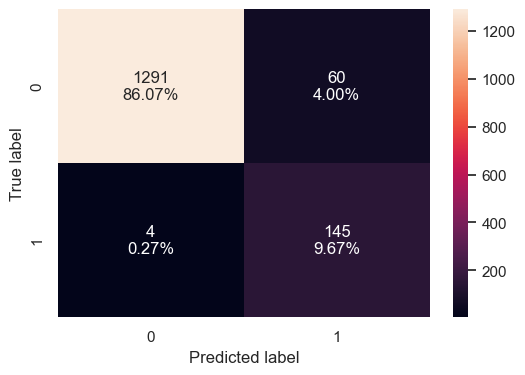

<IPython.core.display.Javascript object>

In [156]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [157]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model2, X_test, y_test
)
decision_tree_postpruned_perf_test


Accuracy  Recall  Precision    F1
0     0.957   0.973      0.707 0.819

<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

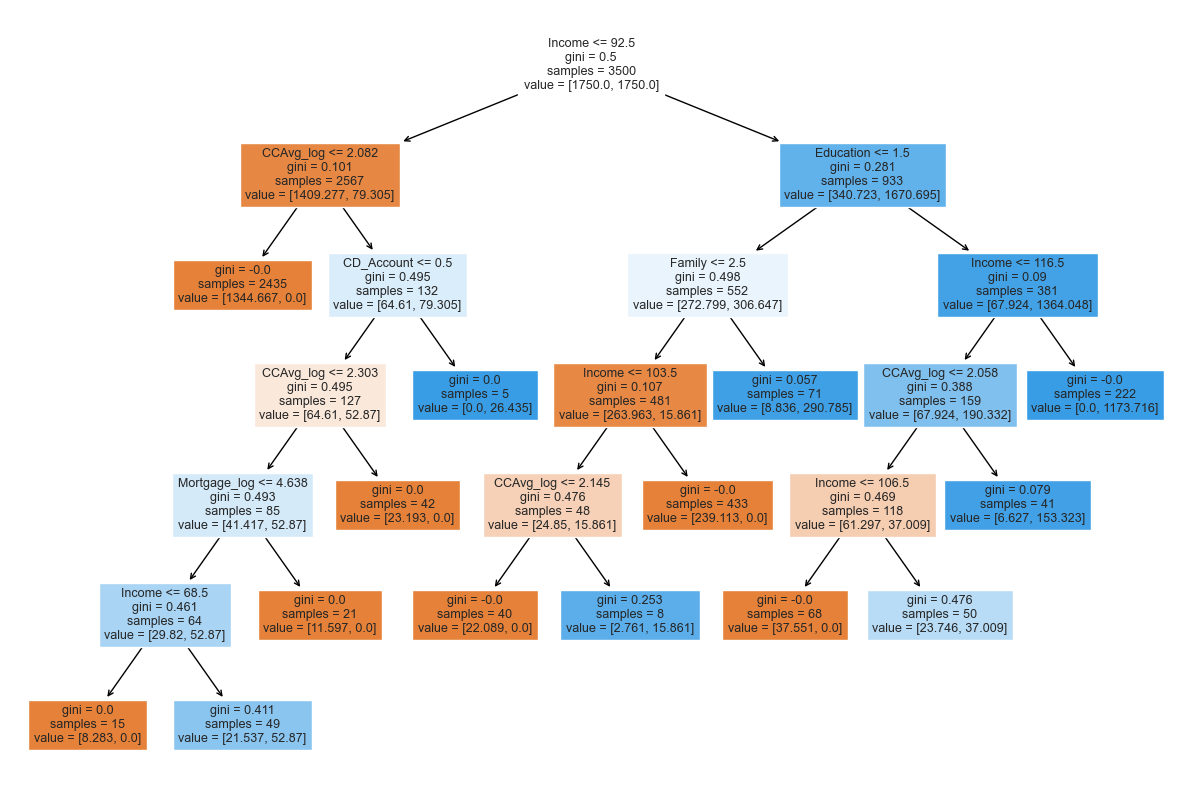

<IPython.core.display.Javascript object>

In [158]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [159]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg_log <= 2.08
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg_log >  2.08
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg_log <= 2.30
|   |   |   |   |--- Mortgage_log <= 4.64
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [8.28, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- weights: [21.54, 52.87] class: 1
|   |   |   |   |--- Mortgage_log >  4.64
|   |   |   |   |   |--- weights: [11.60, 0.00] class: 0
|   |   |   |--- CCAvg_log >  2.30
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- CCAvg_log <= 2.15
|   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |--- CCAvg_log >  2.15
|   |   |   |   |   |--- weights: [2.76, 15.86] clas

<IPython.core.display.Javascript object>

In [160]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                     Imp
Income             0.663
Family             0.146
Education          0.089
CCAvg_log          0.089
CD_Account         0.008
Mortgage_log       0.005
Age                0.000
Experience         0.000
Securities_Account 0.000
Online             0.000
CreditCard         0.000


<IPython.core.display.Javascript object>

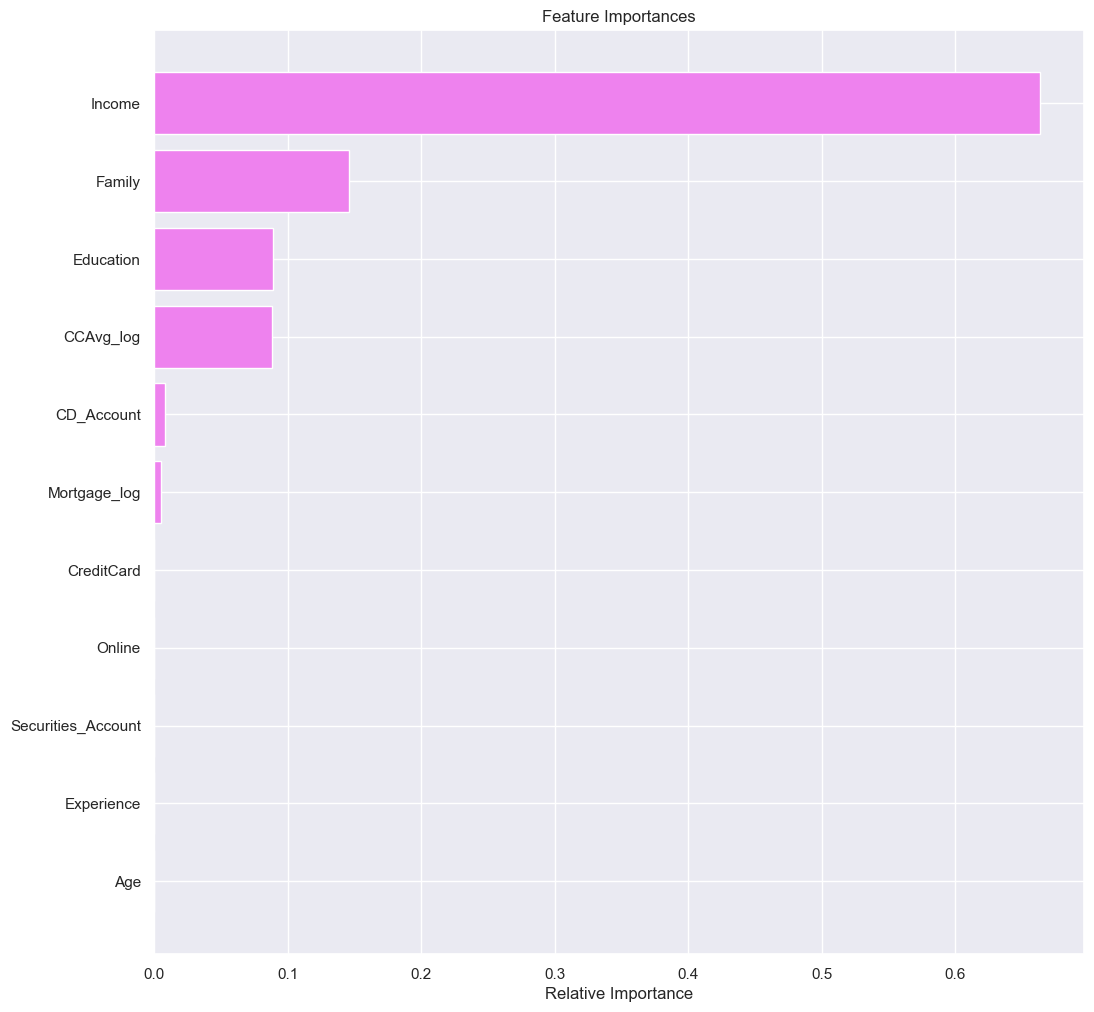

<IPython.core.display.Javascript object>

In [161]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Comparing all the decision tree models

In [162]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                   1.000                        0.995   
Recall                     1.000                        1.000   
Precision                  1.000                        0.951   
F1                         1.000                        0.975   

           Decision Tree (Post-Pruning)  
Accuracy                          0.993  
Recall                            0.967  
Precision                         0.958  
F1                                0.962

<IPython.core.display.Javascript object>

In [163]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                   0.976                        0.973   
Recall                     0.866                        0.879   
Precision                  0.890                        0.856   
F1                         0.878                        0.868   

           Decision Tree (Post-Pruning)  
Accuracy                          0.957  
Recall                            0.973  
Precision                         0.707  
F1                                0.819

<IPython.core.display.Javascript object>

### Conclusions

* For the busniess case reducing False Positive and Flase Negative are eually importannt. So F1 Score is better metric
* Logistic Regression model with threshold at 0.35 has a better F1 Score at 0.693
* Decision Tree model with Pre - Pruning has F1 score of 0.868. 
* Model generated by Decision Tree with Pre - Pruning method should be the preferred model with F1 Score of 0.868
* Income is the single most important feature to determine the Perosnal Loan.

### Recommendations for Maketing team

Traget the following classifications

* Having vs NOT having credit cards doesn't indicate a strong relationship with Personal Loan
* Using vs NOT using Online banking services doesn't indicate a strong relationship with Personal Loan
* Persons with annual income less than 92,500 and average monthly credit card spending < 2,080 has a very high probability of NOT having personal loan
*  90%  of persons without securities account DONOT have personal loan
*  88%  of persons with securities account DONOT have personal loan  
*  92% of persons without current deposit accounts DONOT have personal loan.  
*  53% of customers with current deposit accounts DONOT have personal loan.  
*  95% of persons with Education level as undergrad DONOT have personal loan. With higher education the probability of having personal loan tends to increase by very slight margins. 
* Family size of 1 and 2 has LESS probability of having loans  
* Out of all people of who DONOT have personal loans, 75% of persons have annual income below 84,000 
* Out of all people of who DONOT have personal loans, 75% of persons have monthly average credit card spending less than 2,300 
* 90% of persons who doesn't have mortgage also DONOT have personal loan
